## Pendahuluan

Haloo.. tidak terasa ya, sudah memasuki akhir pekan dari pelatihan data sains. Saya merasa bahwa dari pelatihan ini, banyak memberi manfaat, mulai dari skill coding python yang meningkat (walaupun saya baru mulai belajar python di pelatihan ini), skill problem solving yang semakin terasah, sampai dengan mendapat teman baru yang keren-keren. Trainer dan asistennya pun tidak kalah keren. Sukses terus untuk semuanya.

Saya berharap dari pelatihan ini, dapat memperoleh pekerjaan di bidang data sains, atau setidaknya saya dapat memperoleh program internship data sains, walaupun statusnya *unpaid*. Karena saya sudah cukup lama berstatus menjadi jobseeker dan ingin sekali terjun langsung di perusahaan. Saya memang belum memiliki pengalaman kerja, tetapi saya memiliki cukup banyak pengalaman dalam bidang data sains yang diperoleh dari belajar sendiri maupun mengikuti pelatihan.

Pada tugas akhir ini, saya tidak akan menggunakan class dan def, karena selain untuk memperkecil error, saya berasumsi bahwa pembaca merupakan orang awam, baik dari pemahaman kodenya maupun pembacaan laporan, sehingga saya memposisikan diri sebagai programmer yang berusaha untuk membuat kode yang mudah dimengerti dan membuat laporan dengan bahasa yang mudah dipahami.

### 1. *Business Understanding*
#### Alasan dan tujuan mengambil suatu topik tertentu~~

#### 1.1. Alasan Mengambil Suatu Topik Tertentu
Pada kesempatan tugas akhir ini, saya akan mengambil tema atau topik mengenai omicron. Menurut saya, tema omicron cukup menarik, karena virus tersebut merupakan virus terbaru yang ada di bumi ini. Virus tersebut merupakan mutasi dari coronavirus, yang pertamakali terdeteksi di negara china. Anehnya, virus ini ramai di luar negeri, tetapi tidak untuk dalam negeri. Menurut sumber yang diperoleh dari https://www.cnbcindonesia.com/news/20211210080628-4-298152/who-sebut-omicron-sudah-ditemukan-di-57-negara-ri-termasuk, WHO menjelaskan bahwa varian omicron pertamakali terdeteksi di negara afrika selatan. Varian ini merupakan varian ke-5 dari virus corona. WHO juga menyebutkan bahwa jumlah kasus Covid-19 yang dilaporkan di Afrika Selatan berlipat ganda dalam seminggu hingga 5 Desember, menjadi lebih dari 62.000 dan peningkatan sangat besar telah terlihat di Eswatini, Zimbabwe, Mozambik, Namibia, dan Lesotho. Kemudian, dapat dilihat juga bahwa akhir-akhir ini, jumlah orang yang dinyatakan positif covid tidak lebih dari 500 per hari. Walaupun beberapa media sudah memberitakan bahwa di Indonesia sudah masuk varian omicron tersebut. Varian tersebut juga menyebabkan batalnya partisipasi Indonesia dalam kejuaraan dunia olahraga kategori bulutangkis, karena ingin menjaga keselamatan para atlet. 

#### 1.2. Tujuan dari Mengambil Topik Tersebut

Tujuan dari pengambilan topik tersebut, karena saya ingin mengetahui :

1. Bagaimana opini masyarakat di media sosial twitter mengenai varian baru covid omicron ?
2. Bagaimana sentimen opini yang diperoleh mengenai omicron ? apakah negatif, netral, atau positif ?
3. Apa saja topik yang diperoleh dari kumpulan opini tersebut ?
4. Bagaimana hubungan antarkata yang diperoleh ?

### 2. *Data Collection*
#### Mengambil data teks dari twitter dan data teks tambahan dari website~~

In [3]:
# memanggil library yang dibutuhkan
import re
import csv
import json
import nltk
import tqdm
import gensim
import tweepy
import string
import pyLDAvis
import numpy as np
import pandas as pd
import seaborn as sns
import networkx as nx
import matplotlib.pyplot as plt
import pyLDAvis.gensim_models as gensimvis
import warnings
warnings.filterwarnings("ignore")

from numpy import nan  
from numpy import array
from pprint import pprint
from gensim import corpora
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from gensim.models.ldamodel import LdaModel
from urllib.request import Request, urlopen
from gensim.models.coherencemodel import CoherenceModel

In [11]:
# Data1. mengambil data teks dari twitter
# memasukkan data token yang diperoleh dari developer twitter         
api_key = 'tTCB46Mo6Jt3py6MsJj9lZW5Y'
api_key_secret = 'jz7NWOisw00d1s0F9BvJbEdKOrd8TJFiGUWDHBuALsoDRSK5tR'
access_token = '1465546984761151494-ocdkqTTVpmum9VUFfHtWC2rGWx95nA'
access_token_secret = 'NC9dFRT5GBtgEXOf8HXTWosvrNBbeT9D95qv7eGB6Krct'  

In [12]:
# membuat variabel authentikasi dan api
auth = tweepy.OAuthHandler(api_key, api_key_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
print('status api : {} - berhasil'.format(api))

status api : <tweepy.api.API object at 0x000001A1583D9B50> - berhasil


In [13]:
# membuat kata kunci, menentukan tanggal tweetnya, dan menentukan banyaknya tweet yang diambil, dalam hal ini saya ambil
# 1000 sampel tweet
kata_kunci = '#omicron'
tanggal_akhir = '2021-12-08'

tweets = tweepy.Cursor(api.search_tweets, lang = 'id', q = kata_kunci, 
                       until = tanggal_akhir ).items(1000)

print('status tweepy cursor : {} - berhasil'.format(tweets))       

status tweepy cursor : <tweepy.cursor.ItemIterator object at 0x000001A1583E6100> - berhasil


In [14]:
# di run 1x saja, supaya tidak terjadi penumpukan
# membuat list kosong dengan nama tanggal dan tweet, untuk format waktu dan isi tweetnya
tanggal = []
tweet = []

for i in tweets:
    tanggal.append(i.created_at) # method .append() untuk menyimpan data ke dalam sebuah list
    tweet.append(i.text)

In [15]:
# membuat dataframe berdasarkan list yang telah dibuat
df_tweet = pd.DataFrame({'date' : tanggal, 'tweet' : tweet})

# menampilkan hasilnya
display(df_tweet)
print('masih terdapat beberapa data duplicate dari kolom tweet dan belum dilakukan filtering untuk kolom date~')
print('kemudian akan dilakukan filtering kolom date untuk tanggal 3 Desember 2021 sampai dengan 6 Desember 2021~')

,date,tweet
0,2021-12-07 23:47:00+00:00,Menko Marves Luhut Binsar Pandjaitan menekanka...
1,2021-12-07 23:47:00+00:00,Menko Marves Luhut Binsar Pandjaitan menekanka...
2,2021-12-07 21:52:59+00:00,FYI @SouthAfrica @MSF_access @_AfricanUnion \n...
3,2021-12-07 19:39:13+00:00,RT @roastu_memesu: Paavangal\n\n#TamilNaduRain...
4,2021-12-07 19:37:04+00:00,Paavangal\n\n#TamilNaduRains #Ashwinkumar #ash...
...,...,...
995,2021-12-02 13:02:25+00:00,RT @drpriono1: Coronavirus memang senang membe...
996,2021-12-02 13:02:10+00:00,"RT @are_u__sirius: Dear 2022...... \nKya karu,..."
997,2021-12-02 13:01:54+00:00,Remaining 3 members Omicron\n#Omicron #Omicron...
998,2021-12-02 13:01:37+00:00,#Omicron \nIn Pakistan


masih terdapat beberapa data duplicate dari kolom tweet dan belum dilakukan filtering untuk kolom date~
kemudian akan dilakukan filtering kolom date untuk tanggal 3 Desember 2021 sampai dengan 6 Desember 2021~


In [16]:
# filtering untuk kolom date 3 Desember sampai dengan 6 Desember 2021
df_tweet = df_tweet[(df_tweet['date'] > '2021-12-03') & (df_tweet['date'] < '2021-12-07')]

# drop duplicate data pada kolom tweet
df_tweet = df_tweet.drop_duplicates(subset=['tweet'])

# cek hasil
display(df_tweet)

,date,tweet
157,2021-12-06 22:58:38+00:00,AS Perketat Pembatasan di Tengah Kekhawatiran ...
158,2021-12-06 21:50:20+00:00,"Hujan Tak Jadi Penghalang, Polsek Tabanan Laks..."
159,2021-12-06 20:56:25+00:00,"RT @EScorraille: #Omicron, mini #Variant, maxi..."
160,2021-12-06 20:33:43+00:00,"#Omicron, mini #Variant, maxi profit... https:..."
161,2021-12-06 20:27:14+00:00,RT @febriani3690: Fyp gini bukan? \n#Omicron #...
...,...,...
913,2021-12-03 00:38:39+00:00,RT @drpriono1: Jumlah mutasi yg terjadi banyak...
915,2021-12-03 00:33:07+00:00,#Omicron kuasai dunia dalam beberapa bulan lag...
916,2021-12-03 00:31:13+00:00,RT @Shaharudinali: Malaysia boleh dan mampu bu...
917,2021-12-03 00:26:09+00:00,India lapor kes pertama #Omicron \nhttps://t.c...


In [17]:
# Data2. mengambil data teks dari website, website dalam hal ini adalah covid19.go.id
# scrapping text dari website
website = 'https://covid19.go.id/p/berita/penjelasan-who-tentang-omicron-varian-baru-covid-19'
req = Request(website, headers={'User-Agent': 'Mozilla/5.0'})
html = urlopen(req)
data = BeautifulSoup(html, 'html.parser')
print('status {} : ok'.format(req))
print('status {} : ok'.format(html))      

status <urllib.request.Request object at 0x000001A157A50880> : ok
status <http.client.HTTPResponse object at 0x000001A14FC51730> : ok


In [18]:
# mengambil tag dari inspect halaman website
test = data.findAll('article', {'class':'post'})[0]
rows = test.findAll('div')

In [19]:
# mencari submenu pada inspect untuk diambil teksnya, kemudian hasilnya disimpan dalam bentuk list
hasil = []
for row in rows:
    for cell in row.findAll(['p']):
        hasil.append(cell.get_text())
        
# menampilkan resultnya
print(hasil)

# terdapat data duplikat

['Jakarta - Varian baru virus Corona, Omicron sudah terdeteksi di beberapa negara sejak pertama kali ditemukan di Benua Afrika. Varian ini disebut sebagai salah satu yang sangat cepat dalam menularkan virus.', 'World Health Organization (WHO) menyatakan varian B.1.1.529 atau Omicron pertama kali dilaporkan ke WHO dari Afrika Selatan pada 24 November 2021. Situasi epidemiologis di Afrika Selatan telah ditandai oleh tiga puncak berbeda dalam kasus yang dilaporkan, yang terakhir didominasi varian Delta.\xa0', '“Dalam beberapa minggu terakhir, infeksi telah meningkat tajam, bertepatan dengan deteksi varian B.1.1.529. Infeksi B.1.1.529 terkonfirmasi pertama yang diketahui berasal dari spesimen yang dikumpulkan pada 9 November 2021,” demikian penjelasan WHO yang dipublikasikan pada Jumat (26/11).', 'Varian Omicron memiliki sejumlah besar mutasi, beberapa di antaranya mengkhawatirkan. WHO menjelaskan bukti awal menunjukkan peningkatan risiko infeksi ulang dengan varian ini, dibandingkan denga

In [20]:
# menghilangkan data duplikat
clean = []
for i in hasil:
    if i not in clean:
        clean.append(i)
        
# memeriksa kembali
print(clean)

['Jakarta - Varian baru virus Corona, Omicron sudah terdeteksi di beberapa negara sejak pertama kali ditemukan di Benua Afrika. Varian ini disebut sebagai salah satu yang sangat cepat dalam menularkan virus.', 'World Health Organization (WHO) menyatakan varian B.1.1.529 atau Omicron pertama kali dilaporkan ke WHO dari Afrika Selatan pada 24 November 2021. Situasi epidemiologis di Afrika Selatan telah ditandai oleh tiga puncak berbeda dalam kasus yang dilaporkan, yang terakhir didominasi varian Delta.\xa0', '“Dalam beberapa minggu terakhir, infeksi telah meningkat tajam, bertepatan dengan deteksi varian B.1.1.529. Infeksi B.1.1.529 terkonfirmasi pertama yang diketahui berasal dari spesimen yang dikumpulkan pada 9 November 2021,” demikian penjelasan WHO yang dipublikasikan pada Jumat (26/11).', 'Varian Omicron memiliki sejumlah besar mutasi, beberapa di antaranya mengkhawatirkan. WHO menjelaskan bukti awal menunjukkan peningkatan risiko infeksi ulang dengan varian ini, dibandingkan denga

#### karena yang ingin di analisis adalah teksnya, maka akan digabungkan data teks hasil dari twitter dengan data teks yang diperoleh dari website

In [21]:
# membuat data gabungan dari twitter dan website
omicron_mentah = list(df_tweet['tweet']) + clean

# cek hasil
print(omicron_mentah)   

['AS Perketat Pembatasan di Tengah Kekhawatiran Omicron, 83 Negara Masuk Kategori Level 4 https://t.co/lrDGxNMbDx… https://t.co/Hg3z05F1zE', 'Hujan Tak Jadi Penghalang, Polsek Tabanan Laksanakan Yustisi PPKM Level II\n #Covid19 #omicron #PolsekTabanan #PPKM… https://t.co/L58E8yVDcW', 'RT @EScorraille: #Omicron, mini #Variant, maxi profit...', '#Omicron, mini #Variant, maxi profit... https://t.co/AUihxBiGMZ', 'RT @febriani3690: Fyp gini bukan? \n#Omicron #ZemmourVillepinte #บังทันมีไอจีแล้ว #SaudiArabianGP #btsoninstagram #방탄소년단 #supergreenpass #หั…', 'RT @newsonepk: PPP Ke Lahore Main Ziyada Vote Ki Waja Se PMLN Ko Fikar Mand Hona Chahiy... https://t.co/b0iE5PJp2E \n#NewsOne #GForGharidah…', 'RT @newsonepk: G For Gharidah | 06-Dec-2021 | Amir Hassan | Jamshed Iqbal Cheema | Khea... https://t.co/CnpYyEWEeU \n\n#NewsOne #GForGharidah…', "RT @UWAYODivin: Mu Bufaransa bafunze Discotheques ndetse bagiye no gukingira abana bafite hagati y'imyaka 5 na 11. Iwabo bamaze kubona case…", "Mu Bufar

In [22]:
# di run 1x saja
# membuat dataframenya terlebih dahulu
data_omicron = pd.DataFrame({'text' : omicron_mentah})

# cek hasil
display(data_omicron)

# menyimpan datanya dalam bentuk csv dengan nama omicron.csv
data_omicron.to_csv('omicron.csv', index = False, header=True) 

,text
0,AS Perketat Pembatasan di Tengah Kekhawatiran ...
1,"Hujan Tak Jadi Penghalang, Polsek Tabanan Laks..."
2,"RT @EScorraille: #Omicron, mini #Variant, maxi..."
3,"#Omicron, mini #Variant, maxi profit... https:..."
4,RT @febriani3690: Fyp gini bukan? \n#Omicron #...
...,...
573,"Kendati demikian, pemerintah mulai melakukan a..."
574,Kebijakan ini tertuang dalam Surat Edaran Keme...
575,[KPCPEN/RDJS/YRM]
576,Sumber:


### --batas untuk memanggil datanya kembali, batas1

batas ini dibuat dengan tujuan supaya tidak perlu lagi menjalankan kode autentikasi twitter, memperoleh data teks dari twitter, memperoleh data teks tambahan dari website, dan menggabungkan kedua datanya.

In [23]:
# memanggil data yang sudah disimpan
df_omicron = pd.read_csv('omicron.csv')

# cek hasil
display(df_omicron)

,text
0,AS Perketat Pembatasan di Tengah Kekhawatiran ...
1,"Hujan Tak Jadi Penghalang, Polsek Tabanan Laks..."
2,"RT @EScorraille: #Omicron, mini #Variant, maxi..."
3,"#Omicron, mini #Variant, maxi profit... https:..."
4,RT @febriani3690: Fyp gini bukan? \n#Omicron #...
...,...
573,"Kendati demikian, pemerintah mulai melakukan a..."
574,Kebijakan ini tertuang dalam Surat Edaran Keme...
575,[KPCPEN/RDJS/YRM]
576,Sumber:


### 3. *Data Preparation*
#### Melakukan *text preprocessing* dan pembersihan data teks~~

In [25]:
# 1. Case folding
# membuat kumpulan kata pada kolom tersebut menjadi lowercase 
df_omicron['text_clean'] = df_omicron['text'].str.lower()

# menghilangkan alamat url
df_omicron['text_clean'] = df_omicron['text_clean'].replace('http\S+|www\S+|https\S+', '', regex = True)  

# mendelete username
df_omicron['text_clean'] = df_omicron['text_clean'].replace('@[\w]+', '', regex = True)

# menghapus angka yang terdapat dalam setiap tweet
df_omicron['text_clean'] = df_omicron['text_clean'].replace('\d+', '', regex = True)

# menghapus tanda baca
df_omicron['text_clean'] = df_omicron['text_clean'].str.translate(str.maketrans("","",string.punctuation))

# menghapus whitespace
df_omicron['text_clean'] = df_omicron['text_clean'].str.strip()

# menghilangkan karakter khusus
df_omicron['text_clean'] = df_omicron['text_clean'].apply(lambda x: x.encode('ascii', 'ignore').decode('ascii'))

# cek hasil
for i in df_omicron['text_clean']:
    print(i)      

as perketat pembatasan di tengah kekhawatiran omicron  negara masuk kategori level
hujan tak jadi penghalang polsek tabanan laksanakan yustisi ppkm level ii
 covid omicron polsektabanan ppkm
rt  omicron mini variant maxi profit
omicron mini variant maxi profit
rt  fyp gini bukan 
omicron zemmourvillepinte  saudiarabiangp btsoninstagram  supergreenpass 
rt  ppp ke lahore main ziyada vote ki waja se pmln ko fikar mand hona chahiy  
newsone gforgharidah
rt  g for gharidah  dec  amir hassan  jamshed iqbal cheema  khea  

newsone gforgharidah
rt  mu bufaransa bafunze discotheques ndetse bagiye no gukingira abana bafite hagati yimyaka  na  iwabo bamaze kubona case
mu bufaransa bafunze discotheques ndetse bagiye no gukingira abana bafite hagati yimyaka  na  iwabo bamaze kub
terjuman pti ki pervez khattak kay bayyan ki muzamat  pm w tm

watch  

newsone
ppp ke lahore main ziyada vote ki waja se pmln ko fikar mand hona chahiy  
newsone
g for gharidah  dec  amir hassan  jamshed iqbal cheema  khe

In [26]:
# 2. stopwords
# membuat kumpulan stopwords berbahasa indonesia
stopwords_indo = stopwords.words('indonesian')

# menghilangkan stopwords
df_omicron['text_clean'] = df_omicron['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_indo)]))

# cek hasil
for i in df_omicron['text_clean']:
    print(i)       

as perketat pembatasan kekhawatiran omicron negara masuk kategori level
hujan penghalang polsek tabanan laksanakan yustisi ppkm level ii covid omicron polsektabanan ppkm
rt omicron mini variant maxi profit
omicron mini variant maxi profit
rt fyp gini omicron zemmourvillepinte saudiarabiangp btsoninstagram supergreenpass
rt ppp lahore main ziyada vote ki waja pmln ko fikar mand hona chahiy newsone gforgharidah
rt g for gharidah dec amir hassan jamshed iqbal cheema khea newsone gforgharidah
rt mu bufaransa bafunze discotheques ndetse bagiye no gukingira abana bafite hagati yimyaka na iwabo bamaze kubona case
mu bufaransa bafunze discotheques ndetse bagiye no gukingira abana bafite hagati yimyaka na iwabo bamaze kub
terjuman pti ki pervez khattak kay bayyan ki muzamat pm w tm watch newsone
ppp lahore main ziyada vote ki waja pmln ko fikar mand hona chahiy newsone
g for gharidah dec amir hassan jamshed iqbal cheema khea newsone
gunanya dunia modern menyediakan cangkul sekop ngurug tanah se

In [27]:
# 3. menghapus slangwords dan kata lain yang aneh
# membuat kamus list katanya
slang_word = ['rt','voc','entering','amp','klc','dec','fii','cr','dii','djia','mrkts','sg','dikupas', 
              'pennsylva','pennsy','mir','z','tally','mounts','to','newsone','amp','m','jhat','chl','rhe','h', 
              'ko','nggak','tau','apah','in','bihar','ya','arruya','aga','kya','unazidi','ikifika','untu','sayang',
              'ja','dominoqq','bandarqonline','aduq','kitab','vtl','fjp','ili','tjzxkkavvmwntjzfbvuavshhjpacwgc','kes',
              'anjir','ne','be','m','dh','bhdunia','ta','hui','lag','y','sumber','s','imigr','kpcpenrdjsyrm', 
              'hai','pr','baca','yg','bhi','mai','kyun','pokeruangasli','selengkapnya','seat','hongi','ulama','dajjal',
              'nhi','classes','proper','exam','college','ashshadiqah','rupiah','menangkan','manfaatkan','waktumu',
              'kusu','tera','pe','hmte','fir','kwa','je','dah','ki','hi','vs','lo','kr','nak','na','into','dikesan']

# menghapus slangwordsnya
df_omicron['text_clean'] = df_omicron['text_clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (slang_word)]))

# memeriksa kembali
for i in df_omicron['text_clean']:
    print(i)            

as perketat pembatasan kekhawatiran omicron negara masuk kategori level
hujan penghalang polsek tabanan laksanakan yustisi ppkm level ii covid omicron polsektabanan ppkm
omicron mini variant maxi profit
omicron mini variant maxi profit
fyp gini omicron zemmourvillepinte saudiarabiangp btsoninstagram supergreenpass
ppp lahore main ziyada vote waja pmln fikar mand hona chahiy gforgharidah
g for gharidah amir hassan jamshed iqbal cheema khea gforgharidah
mu bufaransa bafunze discotheques ndetse bagiye no gukingira abana bafite hagati yimyaka iwabo bamaze kubona case
mu bufaransa bafunze discotheques ndetse bagiye no gukingira abana bafite hagati yimyaka iwabo bamaze kub
terjuman pti pervez khattak kay bayyan muzamat pm w tm watch
ppp lahore main ziyada vote waja pmln fikar mand hona chahiy
g for gharidah amir hassan jamshed iqbal cheema khea
gunanya dunia modern menyediakan cangkul sekop ngurug tanah sekelas menter
fyp gini omicron zemmourvillepinte saudiarabiangp btsoninstagram
suno tum 

In [28]:
# menampilkan dataframe yang sudah dibersihkan
display(df_omicron)

,text,text_clean
0,AS Perketat Pembatasan di Tengah Kekhawatiran ...,as perketat pembatasan kekhawatiran omicron ne...
1,"Hujan Tak Jadi Penghalang, Polsek Tabanan Laks...",hujan penghalang polsek tabanan laksanakan yus...
2,"RT @EScorraille: #Omicron, mini #Variant, maxi...",omicron mini variant maxi profit
3,"#Omicron, mini #Variant, maxi profit... https:...",omicron mini variant maxi profit
4,RT @febriani3690: Fyp gini bukan? \n#Omicron #...,fyp gini omicron zemmourvillepinte saudiarabia...
...,...,...
573,"Kendati demikian, pemerintah mulai melakukan a...",kendati pemerintah antisipasi salah satunya me...
574,Kebijakan ini tertuang dalam Surat Edaran Keme...,kebijakan tertuang surat edaran kementerian hu...
575,[KPCPEN/RDJS/YRM],
576,Sumber:,


In [29]:
# terdapat baris pada kolom text clean yang kosong, di drop saja
df_omicron = df_omicron.drop(df_omicron.index[575:588])

# cek hasil
display(df_omicron)

,text,text_clean
0,AS Perketat Pembatasan di Tengah Kekhawatiran ...,as perketat pembatasan kekhawatiran omicron ne...
1,"Hujan Tak Jadi Penghalang, Polsek Tabanan Laks...",hujan penghalang polsek tabanan laksanakan yus...
2,"RT @EScorraille: #Omicron, mini #Variant, maxi...",omicron mini variant maxi profit
3,"#Omicron, mini #Variant, maxi profit... https:...",omicron mini variant maxi profit
4,RT @febriani3690: Fyp gini bukan? \n#Omicron #...,fyp gini omicron zemmourvillepinte saudiarabia...
...,...,...
570,"Terkait hal ini, Menteri Kesehatan Budi Gunadi...",terkait menteri kesehatan budi gunadi sadikin ...
571,Ia pun memastikan Indonesia dan dunia saat ini...,indonesia dunia cepat mengidentifikasi varian ...
572,"“Kita tidak perlu terlalu panik, terburu-buru ...",panik terburuburu mengambil kebijakan berdasar...
573,"Kendati demikian, pemerintah mulai melakukan a...",kendati pemerintah antisipasi salah satunya me...


### 4. *Data Processing*
#### Melakukan proses-proses *data text analysis*, seperti mencari distribusi frekuensi karakter per tweet, sentimen analysis, dan lain-lain~~

#### 4.1. Text Analysis : Analisis Teks Berdasarkan Frekuensi Kata

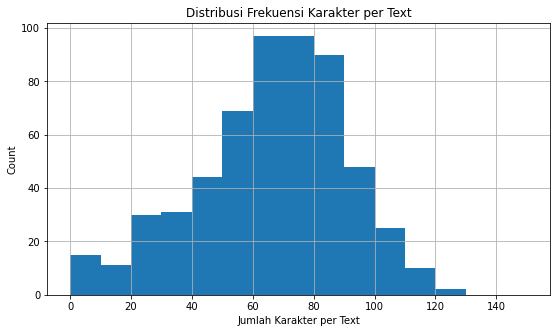

In [30]:
# Text Analysis
# a. Distribusi Frekuensi Karakter per Text

# mengatur ukuran figure
fig, ax = plt.subplots(figsize = (9,5))

# plot the data
bin_range = np.arange(0, 160, 10)
df_omicron['text_clean'].str.len().hist(bins=bin_range)

# membuat judul dan label untuk x dan y axis
plt.title('Distribusi Frekuensi Karakter per Text')
plt.xlabel('Jumlah Karakter per Text')
plt.ylabel('Count')

plt.show()   

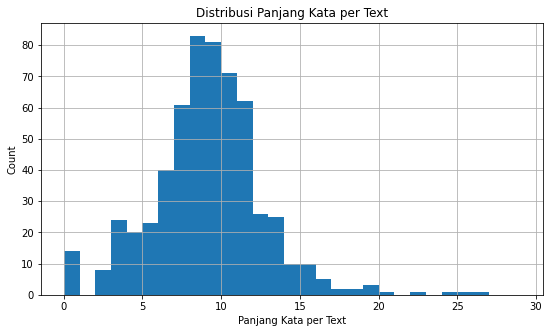

In [31]:
# b. Distribusi panjang kata per Text

# mengatur ukuran figure
fig, ax = plt.subplots(figsize = (9,5))

# plot the data
bin_range = np.arange(0, 30)
df_omicron['text_clean'].str.split().map(lambda x: len(x)).hist(bins=bin_range)

# membuat judul dan label untuk x dan y axis
plt.title('Distribusi Panjang Kata per Text')
plt.xlabel('Panjang Kata per Text')
plt.ylabel('Count')

plt.show()

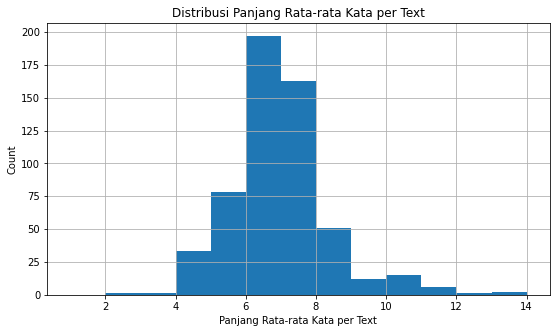

In [32]:
# c. Distribusi panjang rata-rata kata per Text

# mengatur ukuran figure
fig, ax = plt.subplots(figsize = (9,5))

# plot the data
bin_range = np.arange(1, 15)
df_omicron['text_clean'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist(bins=bin_range)

# membuat judul dan label untuk x dan y axis
plt.title('Distribusi Panjang Rata-rata Kata per Text')
plt.xlabel('Panjang Rata-rata Kata per Text')
plt.ylabel('Count')

plt.show()  

In [33]:
# d. Distribusi Kata

# melakukan tokenization pada dataset
df_omicron['text_clean'] = df_omicron['text_clean'].apply(lambda x: word_tokenize(str(x)))

# memasukkan hasil dari semua token tersebut pada satu list yang sama
clean_text= [word for tweet in df_omicron['text_clean'] for word in tweet]

# melihat berapa sample dan keluarannya
fqdist = FreqDist(clean_text)

# cek hasil
print(fqdist)

<FreqDist with 2025 samples and 4986 outcomes>


In [34]:
# Untuk mengetahui kata dan jumlah dari masing-masing, dapat menggunakan :
# menampilkan frekuensi kata terbanyak dengan limit 30
freq_kata = fqdist.most_common(30)
    
# cek hasil
print(freq_kata)  

[('omicron', 507), ('varian', 197), ('covid', 166), ('malaysia', 52), ('who', 43), ('negara', 41), ('singapura', 35), ('virus', 33), ('afrika', 32), ('corona', 24), ('vaksinasi', 22), ('indonesia', 22), ('kesehatan', 22), ('waspada', 21), ('masuk', 20), ('selatan', 20), ('omicronvarient', 19), ('delta', 19), ('dunia', 16), ('vaksin', 16), ('news', 16), ('berita', 16), ('prokes', 16), ('omicronvariant', 15), ('perjalanan', 14), ('india', 13), ('kesihatan', 12), ('menteri', 11), ('b', 11), ('as', 10)]


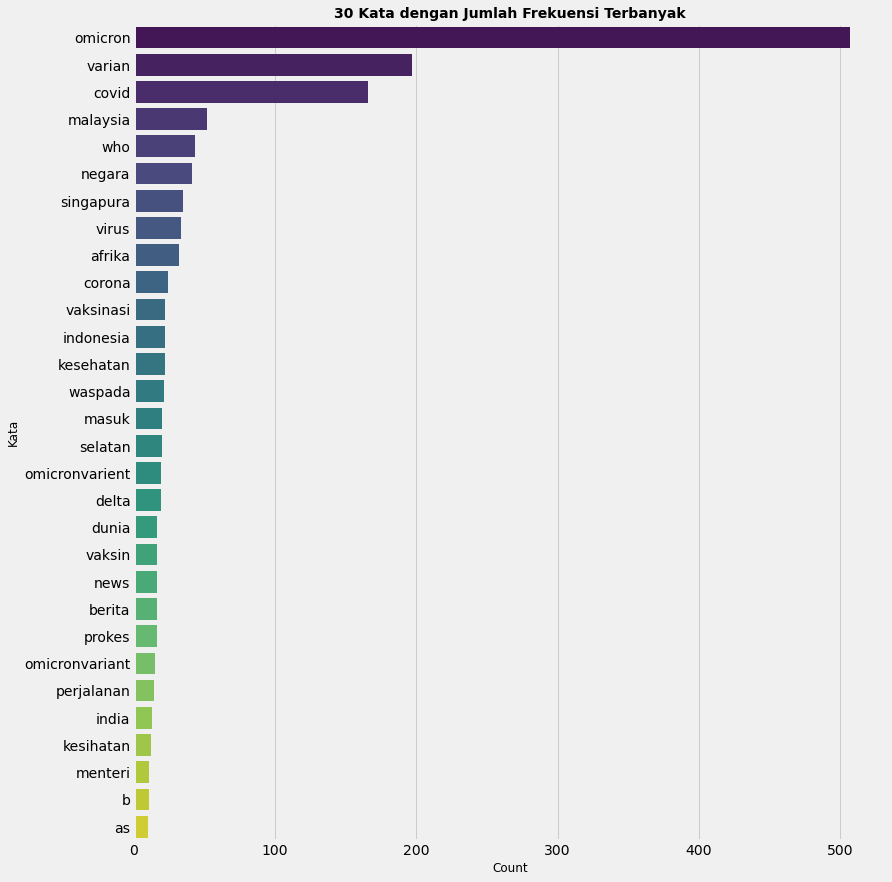

In [35]:
# membuat ke dalam dataframe
f_kata = pd.DataFrame(freq_kata)

# customisasi plot, agar lebih menarik
with plt.style.context('fivethirtyeight'):
    # mengatur figure
    fig, ax = plt.subplots(figsize = (12,14))

    # plot the data 
    sns.barplot(data = f_kata, x = f_kata[1], y = f_kata[0], orient = 'h', palette = 'viridis')

    # membuat judul dan label untuk x dan y axis, serta customisasinya
    plt.title('30 Kata dengan Jumlah Frekuensi Terbanyak', fontweight = 'bold', fontsize = 14)
    plt.xlabel('Count', fontsize = 12)
    plt.ylabel('Kata', fontsize = 12)

    plt.show()

In [36]:
# e. Distribusi bi-gram
hasil = pd.Series(nltk.ngrams(clean_text, 2)).value_counts()[:30]

# cek hasil
print(hasil)

(varian, omicron)            111
(covid, omicron)              56
(omicron, covid)              26
(omicron, omicron)            24
(omicron, malaysia)           23
(varian, covid)               21
(afrika, selatan)             19
(covid, varian)               17
(virus, corona)               13
(omicron, omicronvariant)     13
(waspada, varian)             11
(omicron, who)                11
(omicron, omicronvarient)     10
(omicron, singapura)           8
(protokol, kesehatan)          8
(menteri, kesihatan)           7
(varian, baharu)               7
(omicron, cases)               7
(omicron, ditemukan)           7
(omicron, varian)              6
(pintu, masuk)                 6
(varian, virus)                6
(vaksin, covid)                6
(omicron, negara)              6
(cegah, omicron)               6
(varian, delta)                6
(omicron, masuk)               6
(covid, covid)                 6
(kematian, akibat)             6
(corona, omicron)              6
dtype: int

In [39]:
# unpack list di dalam series untuk membuat wordcloud, tujuan unpack agar lebih mudah dianalisis
text = df_omicron['text_clean'].explode() 

# setelah di unpack, dimasukkan ke dalam list
wc = []
for i in text:
    wc.append(i)  

# cek hasil    
print('terdapat data nan pada list ke-279 dengan tipe float. {}, tipe data : {}'.format(wc[354],type(wc[354])))  

terdapat data nan pada list ke-279 dengan tipe float. nan, tipe data : <class 'float'>


In [40]:
# menghapus data 'nan' dari kumpulan list di wc
new_wc = [x for x in wc if pd.isnull(x) == False]

# cek hasil
print(new_wc)

['as', 'perketat', 'pembatasan', 'kekhawatiran', 'omicron', 'negara', 'masuk', 'kategori', 'level', 'hujan', 'penghalang', 'polsek', 'tabanan', 'laksanakan', 'yustisi', 'ppkm', 'level', 'ii', 'covid', 'omicron', 'polsektabanan', 'ppkm', 'omicron', 'mini', 'variant', 'maxi', 'profit', 'omicron', 'mini', 'variant', 'maxi', 'profit', 'fyp', 'gini', 'omicron', 'zemmourvillepinte', 'saudiarabiangp', 'btsoninstagram', 'supergreenpass', 'ppp', 'lahore', 'main', 'ziyada', 'vote', 'waja', 'pmln', 'fikar', 'mand', 'hona', 'chahiy', 'gforgharidah', 'g', 'for', 'gharidah', 'amir', 'hassan', 'jamshed', 'iqbal', 'cheema', 'khea', 'gforgharidah', 'mu', 'bufaransa', 'bafunze', 'discotheques', 'ndetse', 'bagiye', 'no', 'gukingira', 'abana', 'bafite', 'hagati', 'yimyaka', 'iwabo', 'bamaze', 'kubona', 'case', 'mu', 'bufaransa', 'bafunze', 'discotheques', 'ndetse', 'bagiye', 'no', 'gukingira', 'abana', 'bafite', 'hagati', 'yimyaka', 'iwabo', 'bamaze', 'kub', 'terjuman', 'pti', 'pervez', 'khattak', 'kay', 

In [41]:
# kemudian melakukan join kata, supaya dapat dibentuk wordcloud 
words_2 = ' '.join(new_wc)

# cek hasil
print(words_2)

as perketat pembatasan kekhawatiran omicron negara masuk kategori level hujan penghalang polsek tabanan laksanakan yustisi ppkm level ii covid omicron polsektabanan ppkm omicron mini variant maxi profit omicron mini variant maxi profit fyp gini omicron zemmourvillepinte saudiarabiangp btsoninstagram supergreenpass ppp lahore main ziyada vote waja pmln fikar mand hona chahiy gforgharidah g for gharidah amir hassan jamshed iqbal cheema khea gforgharidah mu bufaransa bafunze discotheques ndetse bagiye no gukingira abana bafite hagati yimyaka iwabo bamaze kubona case mu bufaransa bafunze discotheques ndetse bagiye no gukingira abana bafite hagati yimyaka iwabo bamaze kub terjuman pti pervez khattak kay bayyan muzamat pm w tm watch ppp lahore main ziyada vote waja pmln fikar mand hona chahiy g for gharidah amir hassan jamshed iqbal cheema khea gunanya dunia modern menyediakan cangkul sekop ngurug tanah sekelas menter fyp gini omicron zemmourvillepinte saudiarabiangp btsoninstagram suno tum 

Word Cloud


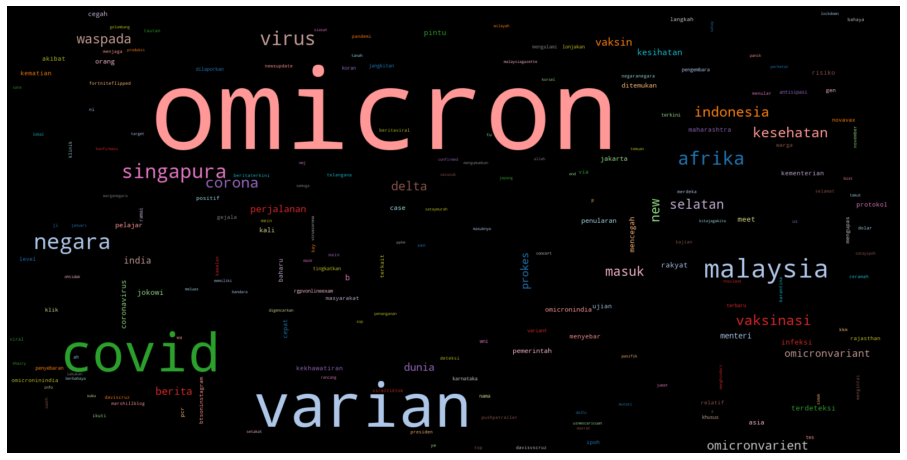

In [42]:
# membuat wordcloud
print('Word Cloud')
# mengatur ukuran figure
fig, ax = plt.subplots(figsize = (16,14))

# membuat wordcloud
wc = WordCloud(width=1600, height=800, 
               max_font_size=200, max_words = 200, collocations = False,
               colormap = 'tab20', random_state = 7, relative_scaling = 0.75).generate(words_2)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

plt.show()

In [53]:
# menyimpan data yang sudah bersih ke dalam dataframe baru
# tujuannya adalah, supaya saat mengerjakan di waktu yang berbeda, 
# tidak perlu lagi melakukan proses data preparation dan beberapa data text analysis
# melakukan join terlebih dahulu, di-run 1x saja agar tidak terjadi stack
df_omicron['text_clean'] = df_omicron['text_clean'].apply(lambda x: ' '.join(x))

In [57]:
# cek hasil setelah dilakukan join
display(df_omicron)

# terdapat satu buah data duplikat, yaitu pada baris ke-3 dan ke-4, kemudian akan di drop
df_omicron = df_omicron.drop_duplicates(subset=['text_clean'])

,text,text_clean
0,AS Perketat Pembatasan di Tengah Kekhawatiran ...,as perketat pembatasan kekhawatiran omicron ne...
1,"Hujan Tak Jadi Penghalang, Polsek Tabanan Laks...",hujan penghalang polsek tabanan laksanakan yus...
2,"RT @EScorraille: #Omicron, mini #Variant, maxi...",omicron mini variant maxi profit
4,RT @febriani3690: Fyp gini bukan? \n#Omicron #...,fyp gini omicron zemmourvillepinte saudiarabia...
5,RT @newsonepk: PPP Ke Lahore Main Ziyada Vote ...,ppp lahore main ziyada vote waja pmln fikar ma...
...,...,...
570,"Terkait hal ini, Menteri Kesehatan Budi Gunadi...",terkait menteri kesehatan budi gunadi sadikin ...
571,Ia pun memastikan Indonesia dan dunia saat ini...,indonesia dunia cepat mengidentifikasi varian ...
572,"“Kita tidak perlu terlalu panik, terburu-buru ...",panik terburuburu mengambil kebijakan berdasar...
573,"Kendati demikian, pemerintah mulai melakukan a...",kendati pemerintah antisipasi salah satunya me...


In [58]:
# cek hasil setelah data duplikat di drop
display(df_omicron)

,text,text_clean
0,AS Perketat Pembatasan di Tengah Kekhawatiran ...,as perketat pembatasan kekhawatiran omicron ne...
1,"Hujan Tak Jadi Penghalang, Polsek Tabanan Laks...",hujan penghalang polsek tabanan laksanakan yus...
2,"RT @EScorraille: #Omicron, mini #Variant, maxi...",omicron mini variant maxi profit
4,RT @febriani3690: Fyp gini bukan? \n#Omicron #...,fyp gini omicron zemmourvillepinte saudiarabia...
5,RT @newsonepk: PPP Ke Lahore Main Ziyada Vote ...,ppp lahore main ziyada vote waja pmln fikar ma...
...,...,...
570,"Terkait hal ini, Menteri Kesehatan Budi Gunadi...",terkait menteri kesehatan budi gunadi sadikin ...
571,Ia pun memastikan Indonesia dan dunia saat ini...,indonesia dunia cepat mengidentifikasi varian ...
572,"“Kita tidak perlu terlalu panik, terburu-buru ...",panik terburuburu mengambil kebijakan berdasar...
573,"Kendati demikian, pemerintah mulai melakukan a...",kendati pemerintah antisipasi salah satunya me...


In [59]:
# menyimpan datanya dalam bentuk csv dengan nama clean_omicron.csv
df_omicron.to_csv('clean_omicron.csv', index = False, header=True) 

### --batas untuk memanggil datanya kembali, batas2

In [3]:
# memanggil data yang sudah disimpan
df_clean = pd.read_csv('clean_omicron.csv')

# cek hasil
display(df_clean)

# cek hasil dengan lebih detil
for i in df_clean['text_clean']:
    print(i)

,text,text_clean
0,AS Perketat Pembatasan di Tengah Kekhawatiran ...,as perketat pembatasan kekhawatiran omicron ne...
1,"Hujan Tak Jadi Penghalang, Polsek Tabanan Laks...",hujan penghalang polsek tabanan laksanakan yus...
2,"RT @EScorraille: #Omicron, mini #Variant, maxi...",omicron mini variant maxi profit
3,RT @febriani3690: Fyp gini bukan? \n#Omicron #...,fyp gini omicron zemmourvillepinte saudiarabia...
4,RT @newsonepk: PPP Ke Lahore Main Ziyada Vote ...,ppp lahore main ziyada vote waja pmln fikar ma...
...,...,...
505,"Terkait hal ini, Menteri Kesehatan Budi Gunadi...",terkait menteri kesehatan budi gunadi sadikin ...
506,Ia pun memastikan Indonesia dan dunia saat ini...,indonesia dunia cepat mengidentifikasi varian ...
507,"“Kita tidak perlu terlalu panik, terburu-buru ...",panik terburuburu mengambil kebijakan berdasar...
508,"Kendati demikian, pemerintah mulai melakukan a...",kendati pemerintah antisipasi salah satunya me...


as perketat pembatasan kekhawatiran omicron negara masuk kategori level
hujan penghalang polsek tabanan laksanakan yustisi ppkm level ii covid omicron polsektabanan ppkm
omicron mini variant maxi profit
fyp gini omicron zemmourvillepinte saudiarabiangp btsoninstagram supergreenpass
ppp lahore main ziyada vote waja pmln fikar mand hona chahiy gforgharidah
g for gharidah amir hassan jamshed iqbal cheema khea gforgharidah
mu bufaransa bafunze discotheques ndetse bagiye no gukingira abana bafite hagati yimyaka iwabo bamaze kubona case
mu bufaransa bafunze discotheques ndetse bagiye no gukingira abana bafite hagati yimyaka iwabo bamaze kub
terjuman pti pervez khattak kay bayyan muzamat pm w tm watch
ppp lahore main ziyada vote waja pmln fikar mand hona chahiy
g for gharidah amir hassan jamshed iqbal cheema khea
gunanya dunia modern menyediakan cangkul sekop ngurug tanah sekelas menter
fyp gini omicron zemmourvillepinte saudiarabiangp btsoninstagram
suno tum lahasil rehna warna qadar khoo do

**note :** dari hasil pembersihan teks di atas, dapat dilihat bahwa masih banyak huruf dan kata yang tidak memiliki makna. Saya sengaja tidak melakukan *dropping*, karena frekuensi jumlah huruf dan kata tersebut relatif sedikit.

#### 4.2. Text Analysis : Analisis Sentimen. Melihat sentimen negatif, netral, atau positif

In [4]:
# memanggil kamus yang berisi kumpulan kata positif. kamus diperoleh dari latihan sebelumnya
pos_list= open("./kata_positif.txt","r")
pos_kata = pos_list.readlines()

# melihat isi datanya
# coba mengambil 5 data
print(pos_kata[0:5])

['absah\n', 'absolut\n', 'acuan\n', 'afdol\n', 'ahli\n']


In [6]:
# memanggil kamus yang berisi kumpulan kata positif
neg_list= open("./kata_negatif.txt","r")
neg_kata = neg_list.readlines()  

# melihat isi datanya
# coba mengambil 5 data
print(neg_kata[0:5])

['acak-acakan\n', 'adu\n', 'adu domba\n', 'aib\n', 'akal bulus\n']


In [14]:
# membuat list dari data yang sudah dibersihkan
items = []
for i in df_clean['text_clean']:
    items.append(i)

# terdapat data nan pada list ke-36
print('muncul data "nan" pada list ke-36, yaitu {} dengan tipe : {}'.format(items[36], type(items[36]))) 

muncul data "nan" pada list ke-36, yaitu nan dengan tipe : <class 'float'>


In [15]:
# dropping data nan 
items = [x for x in items if pd.isnull(x) == False]

In [17]:
# menyaring dan menentukan jumlah kata positif dan negatif untuk setiap baris
# hasilnya ditempatkan pada sebuah list kosong
hasil = []
list_anti = ['tidak','lawan','anti', 'belum', 'belom', 'tdk', 'jangan', 'gak', 'enggak', 'bukan', 'sulit', 'tak', 'sblm']
for item in items:
    print(item.strip())
    tweets = item.strip().split() #tokenization
    # print(tweets)
    
    count_p = 0 #nilai positif
    count_n = 0 #nilai negatif
    
    for tweet in tweets:
        for kata_pos in pos_kata:
            if kata_pos.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1], kata_pos, ['negatif'])
                    count_n += 1
                else:
                    print(kata_pos, ['positif'])
                    count_p += 1
        for kata_neg in neg_kata:
            if kata_neg.strip().lower() == tweet.lower():
                if items[items.index(item)-1] in list_anti:
                    print(items[items.index(item)-1], kata_neg, ['positif'])
                    count_p += 1
                else:
                    print(kata_neg, ['negatif'])
                    count_n += 1
    
    print ("positif: "+str(count_p))
    print ("negatif: "+str(count_n))
    hasil.append(count_p - count_n)
    print ("-----------------------------------------------------")

as perketat pembatasan kekhawatiran omicron negara masuk kategori level
pembatasan
 ['negatif']
kekhawatiran
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
hujan penghalang polsek tabanan laksanakan yustisi ppkm level ii covid omicron polsektabanan ppkm
penghalang
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
omicron mini variant maxi profit
profit
 ['positif']
positif: 1
negatif: 0
-----------------------------------------------------
fyp gini omicron zemmourvillepinte saudiarabiangp btsoninstagram supergreenpass
positif: 0
negatif: 0
-----------------------------------------------------
ppp lahore main ziyada vote waja pmln fikar mand hona chahiy gforgharidah
positif: 0
negatif: 0
-----------------------------------------------------
g for gharidah amir hassan jamshed iqbal cheema khea gforgharidah
positif: 0
negatif: 0
-----------------------------------------------------
mu bufaransa bafunze discot

positif: 0
negatif: 2
-----------------------------------------------------
afrika disorot varian omicron dunia alpa negaranegara miskin jata
miskin
 ['negatif']
miskin
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
risau raya politik benua omicron covid singapura
risau
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
uinwscaricuan uinwscaricuan uinwscaricuan uinwscaricuan ngeneki arep rabi enhypen istanbul spidermannow
positif: 0
negatif: 0
-----------------------------------------------------
saham korsel jatuh omicron menyebar data inflasi as fokus korsel
inflasi
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
buletinfmhighlights singapura catat import omicron amukan semeru ranapkan lumajang aung san
positif: 0
negatif: 0
-----------------------------------------------------
berbahaya varian omicron merubah manusia buas varian ohlapar
berbahaya
 ['negatif']
buas

positif: 0
negatif: 0
-----------------------------------------------------
imbauan kewaspadaan terkait perkembangan pandemi covid varian omicron new south wales queensland south a
perkembangan
 ['positif']
pandemi
 ['negatif']
positif: 1
negatif: 1
-----------------------------------------------------
sulitnya disiplin protokol kesehatan mengikuti vaksinasi taatprokesselamapandemi omicron
sulitnya
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
omicron mengintai kencangkan prokesnya taatprokesselamapandemi omicron indonesiasehatindonesiahebat
positif: 0
negatif: 0
-----------------------------------------------------
disiplin prokes vaksinasi kunci taatprokesselamapandemi omicron indonesiasehatindonesiahebat
positif: 0
negatif: 0
-----------------------------------------------------
varian omicron bermutasi efektif dideteksi tes pcr metode sgene target failure sgtf ap
efektif
 ['positif']
positif: 1
negatif: 0
----------------------------------

negatif
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
berita terbaru waspadai varian omicron andrei angouw warga divaksin andreiangouw omicron
positif: 0
negatif: 0
-----------------------------------------------------
simak info jogjaistimewa kominfodiy covid omicron
positif: 0
negatif: 0
-----------------------------------------------------
mengupas relatif kajian ceramah
positif: 0
negatif: 0
-----------------------------------------------------
ecdc varian omicron berpotensi mendominasi covid eropa omicron
positif: 0
negatif: 0
-----------------------------------------------------
esok pengembara memasuki singapura menerusi laluan perjalanan vaksinasi menjalani sar
positif: 0
negatif: 0
-----------------------------------------------------
morning karuthu moneyheist strictly happyjinday omicron trending btc crypto indvznz
positif: 0
negatif: 0
-----------------------------------------------------
mengupas mimpi allah relatif
positif: 0
neg

positif: 0
negatif: 0
-----------------------------------------------------
varian omicron persen menular waspada klik tautan kudus varian
menular
 ['negatif']
waspada
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
situasi pandemi covid kebutuhan oksigen pagi pasien covid dibutuh
pandemi
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
kematian akibat omicron covid omicron omicronvariant news indonesia indoposco
kematian
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
meet or prac
positif: 0
negatif: 0
-----------------------------------------------------
infografik varian omicron malaysia bernama klik berita
positif: 0
negatif: 0
-----------------------------------------------------
rgpvonlineexam meet ha
positif: 0
negatif: 0
-----------------------------------------------------
rancang jer lalai covid malaysia omicron
lalai
 ['negatif']
positif: 0
negatif: 1
---

positif: 0
negatif: 0
-----------------------------------------------------
varian omicron mengkhawatirkan berbahaya yuk simak penjelasannya
mengkhawatirkan
 ['negatif']
berbahaya
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
antisipasi covid omicron nataru ridwan kamil tunda libur sekolah ujian semester
kamil
 ['positif']
positif: 1
negatif: 0
-----------------------------------------------------
singapura malaysia deteksi covid varian omicron negara viruscorona
positif: 0
negatif: 0
-----------------------------------------------------
covid omicron australia malaysia libatkan penumpang transit singapura omicron
positif: 0
negatif: 0
-----------------------------------------------------
top news koran rakyat merdeka garagara omicron afrika dihukum omicron omicronvariant africa
dihukum
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
omicron kitajagakita jaganegarakita
positif: 0
negatif: 0
------------

berguna
 ['positif']
positif: 1
negatif: 0
-----------------------------------------------------
halo indonesia omicron tetangga singapura malaysia waspada prokesketat
waspada
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
jokowi cegah omicron klik tautan jakarta presiden jokowi varian
positif: 0
negatif: 0
-----------------------------------------------------
itangazo rijyanye nishyirwa mu kato ku bagenzi baturutse muri botswana eswatini lesotho malawi mozambique namibia
positif: 0
negatif: 0
-----------------------------------------------------
omicron ditemukan negeri jiran indonesia tutup pintu kedatangan malaysia
tutup
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
cakap la covid varian omicron decepticon proton bahaya dasyat mcm punnampak spesis kayangan
cakap
 ['positif']
bahaya
 ['negatif']
positif: 1
negatif: 1
-----------------------------------------------------
varian omicron rangkuman berit

positif: 0
negatif: 0
-----------------------------------------------------
pemerintah inggris mempercepat pemberian booster vaksinasi mnctvnews
positif: 0
negatif: 0
-----------------------------------------------------
positif varian omicron singapura covid ohtidak omicron singapura
positif
 ['positif']
positif: 1
negatif: 0
-----------------------------------------------------
virus omicron mengintai bandara soekarnohatta diperketat sasarannya wisatawan negeri
virus
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
okay perak ye rancak berdosa omicron
berdosa
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
rancang lalai omicron
lalai
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
novavax vaksin khusus omicron januari virus corona omicron perusahaan farmasi novavax
virus
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
perin

positif: 0
negatif: 0
-----------------------------------------------------
datangnya rakyat pulih kehidupan omicron malaysia ikuti tan kar hin
pulih
 ['positif']
positif: 1
negatif: 0
-----------------------------------------------------
moga omicron
positif: 0
negatif: 0
-----------------------------------------------------
covid varian omicron malaysia
positif: 0
negatif: 0
-----------------------------------------------------
melibatkan pengembara warganegara berusia afrika selatan singapur
positif: 0
negatif: 0
-----------------------------------------------------
kementerian kesihatan mengesahkan covid varian omicron malaysia membabitkan pengemb
positif: 0
negatif: 0
-----------------------------------------------------
omicron varian virus corona terdeteksi singapura via
virus
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
pelajar warganegara malaysia berusia afrika sel
positif: 0
negatif: 0
----------------------------------------------

penularan
 ['negatif']
virus
 ['negatif']
positif: 0
negatif: 2
-----------------------------------------------------
omicron kuasai dunia
positif: 0
negatif: 0
-----------------------------------------------------
malaysia vaksin omicron perlumbaanbiotech
positif: 0
negatif: 0
-----------------------------------------------------
india lapor omicron
positif: 0
negatif: 0
-----------------------------------------------------
peluangnya varian omicron menghindari sistem imun dibangkitkan vaksinasi infeksi alam
infeksi
 ['negatif']
positif: 0
negatif: 1
-----------------------------------------------------
jakarta varian virus corona omicron terdeteksi negara kali ditemukan benua afrika varian salah cepat menularkan virus
virus
 ['negatif']
salah
 ['negatif']
cepat
 ['positif']
menularkan
 ['negatif']
virus
 ['negatif']
positif: 1
negatif: 4
-----------------------------------------------------
world health organization who varian b omicron kali dilaporkan who afrika selatan november sit

In [26]:
# menampilkan nilai skor rata-rata dan standar deviasinya
print ("Nilai rata-rata skor sentimennya : "+str(round(np.mean(hasil),4)))
print ("Standar deviasi skor sentimennya :  "+str(round(np.std(hasil),4)))

Nilai rata-rata skor sentimennya : -0.1965
Standar deviasi skor sentimennya :  0.8979


Dari skor rata-rata nilai di atas, dapat disimpulkan bahwa sentimen yang diperoleh cenderung negatif, walaupun mendekati netral. Hal ini disebabkan karena masih terdapat banyak baris teks yang memiliki kata yang tidak bermakna. Nilai skor dari standar deviasi 0.8979 menunjukkan bahwa, skor untuk setiap baris teks tersebut tidak berbeda jauh dengan skor yang lain.

In [ ]:
style="whitegrid"

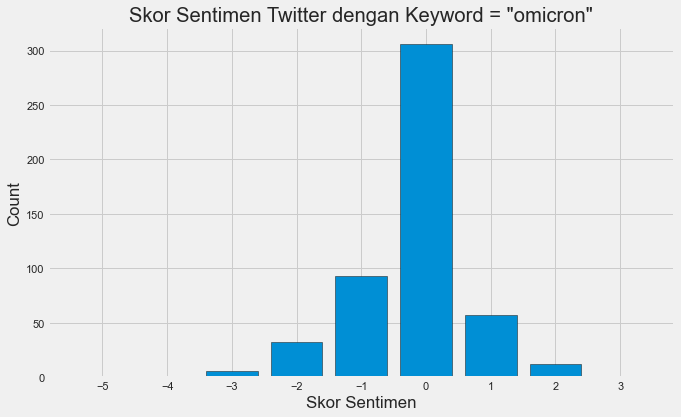

In [42]:
# membuat grafik berdasarkan skor sentimen
with plt.style.context('fivethirtyeight'):
    # membuat ukuran figure
    fig, ax = plt.subplots(figsize = (10,6))

    # plot the data
    labels, counts = np.unique(hasil, return_counts=True)
    plt.bar(labels, counts, align='center', edgecolor = 'k')
    plt.gca().set_xticks(labels)

    # memberi judul dan label untuk x dan y axis
    plt.title('Skor Sentimen Twitter dengan Keyword = "omicron"')
    plt.xlabel('Skor Sentimen')
    plt.ylabel('Count')

    plt.show()

In [48]:
# karena di atas terdapat data nan yang dihapus, maka baris ke-36 pada dataframe juga harus dihapus
# di-run 1x saja, agar baris ke-36 tidak terdelete terus menerus
df_clean = df_clean.drop(df_clean.index[36])

In [81]:
# menggabungkan hasil skornya pada dataframe dengan nama kolom "sentiment"
df_clean['skor sentimen'] = hasil

# cek hasil
display(df_clean)

,text,text_clean,skor sentimen
0,AS Perketat Pembatasan di Tengah Kekhawatiran ...,as perketat pembatasan kekhawatiran omicron ne...,-2
1,"Hujan Tak Jadi Penghalang, Polsek Tabanan Laks...",hujan penghalang polsek tabanan laksanakan yus...,-1
2,"RT @EScorraille: #Omicron, mini #Variant, maxi...",omicron mini variant maxi profit,1
3,RT @febriani3690: Fyp gini bukan? \n#Omicron #...,fyp gini omicron zemmourvillepinte saudiarabia...,0
4,RT @newsonepk: PPP Ke Lahore Main Ziyada Vote ...,ppp lahore main ziyada vote waja pmln fikar ma...,0
...,...,...,...
505,"Terkait hal ini, Menteri Kesehatan Budi Gunadi...",terkait menteri kesehatan budi gunadi sadikin ...,-2
506,Ia pun memastikan Indonesia dan dunia saat ini...,indonesia dunia cepat mengidentifikasi varian ...,1
507,"“Kita tidak perlu terlalu panik, terburu-buru ...",panik terburuburu mengambil kebijakan berdasar...,-1
508,"Kendati demikian, pemerintah mulai melakukan a...",kendati pemerintah antisipasi salah satunya me...,-2


In [102]:
# membuat teks dari skornya
sentimen = ['negatif' if x < 0 else 'netral' if x == 0 else 'positif' for x in df_clean['skor sentimen']]

# kemudian digabungkan kedalam dataframe
df_clean['sentimen'] = sentimen

# cek hasil
display(df_clean)

,text,text_clean,skor sentimen,sentimen
0,AS Perketat Pembatasan di Tengah Kekhawatiran ...,as perketat pembatasan kekhawatiran omicron ne...,-2,negatif
1,"Hujan Tak Jadi Penghalang, Polsek Tabanan Laks...",hujan penghalang polsek tabanan laksanakan yus...,-1,negatif
2,"RT @EScorraille: #Omicron, mini #Variant, maxi...",omicron mini variant maxi profit,1,positif
3,RT @febriani3690: Fyp gini bukan? \n#Omicron #...,fyp gini omicron zemmourvillepinte saudiarabia...,0,netral
4,RT @newsonepk: PPP Ke Lahore Main Ziyada Vote ...,ppp lahore main ziyada vote waja pmln fikar ma...,0,netral
...,...,...,...,...
505,"Terkait hal ini, Menteri Kesehatan Budi Gunadi...",terkait menteri kesehatan budi gunadi sadikin ...,-2,negatif
506,Ia pun memastikan Indonesia dan dunia saat ini...,indonesia dunia cepat mengidentifikasi varian ...,1,positif
507,"“Kita tidak perlu terlalu panik, terburu-buru ...",panik terburuburu mengambil kebijakan berdasar...,-1,negatif
508,"Kendati demikian, pemerintah mulai melakukan a...",kendati pemerintah antisipasi salah satunya me...,-2,negatif


In [103]:
# sebelum di drop baris yang tidak memiliki makna pada kolom text clean, save terlebih dahulu
# menyimpan datanya dalam bentuk csv dengan nama baris_omicron.csv
# di run 1x saja
df_clean.to_csv('baris_omicron.csv', index = False, header=True) 

### --batas untuk memanggil datanya kembali, batas3

#### 4.2. Text Analysis : Topic Modelling. Menentukan beberapa topic menggunakan metode Latent Dirichlet Allocation (LDA)

tujuan dibuatnya batas ini adalah, supaya tidak perlu menjalankan kode untuk melakukan sentimen anlisis

In [8]:
# memanggil kembali data yang telah disimpan
df_baris = pd.read_csv('baris_omicron.csv')

# cek hasil
display(df_baris ) 

,text,text_clean,skor sentimen,sentimen
0,AS Perketat Pembatasan di Tengah Kekhawatiran ...,as perketat pembatasan kekhawatiran omicron ne...,-2,negatif
1,"Hujan Tak Jadi Penghalang, Polsek Tabanan Laks...",hujan penghalang polsek tabanan laksanakan yus...,-1,negatif
2,"RT @EScorraille: #Omicron, mini #Variant, maxi...",omicron mini variant maxi profit,1,positif
3,RT @febriani3690: Fyp gini bukan? \n#Omicron #...,fyp gini omicron zemmourvillepinte saudiarabia...,0,netral
4,RT @newsonepk: PPP Ke Lahore Main Ziyada Vote ...,ppp lahore main ziyada vote waja pmln fikar ma...,0,netral
...,...,...,...,...
504,"Terkait hal ini, Menteri Kesehatan Budi Gunadi...",terkait menteri kesehatan budi gunadi sadikin ...,-2,negatif
505,Ia pun memastikan Indonesia dan dunia saat ini...,indonesia dunia cepat mengidentifikasi varian ...,1,positif
506,"“Kita tidak perlu terlalu panik, terburu-buru ...",panik terburuburu mengambil kebijakan berdasar...,-1,negatif
507,"Kendati demikian, pemerintah mulai melakukan a...",kendati pemerintah antisipasi salah satunya me...,-2,negatif


In [9]:
# akan di drop data pada baris dan kolom text_clean yang tidak memiliki makna atau memiliki bahasa selain indonesia
# mencari baris
for i, nomor in enumerate(df_baris['text_clean']):
    print('{}. {}'.format(i,nomor)) 

0. as perketat pembatasan kekhawatiran omicron negara masuk kategori level
1. hujan penghalang polsek tabanan laksanakan yustisi ppkm level ii covid omicron polsektabanan ppkm
2. omicron mini variant maxi profit
3. fyp gini omicron zemmourvillepinte saudiarabiangp btsoninstagram supergreenpass
4. ppp lahore main ziyada vote waja pmln fikar mand hona chahiy gforgharidah
5. g for gharidah amir hassan jamshed iqbal cheema khea gforgharidah
6. mu bufaransa bafunze discotheques ndetse bagiye no gukingira abana bafite hagati yimyaka iwabo bamaze kubona case
7. mu bufaransa bafunze discotheques ndetse bagiye no gukingira abana bafite hagati yimyaka iwabo bamaze kub
8. terjuman pti pervez khattak kay bayyan muzamat pm w tm watch
9. ppp lahore main ziyada vote waja pmln fikar mand hona chahiy
10. g for gharidah amir hassan jamshed iqbal cheema khea
11. gunanya dunia modern menyediakan cangkul sekop ngurug tanah sekelas menter
12. fyp gini omicron zemmourvillepinte saudiarabiangp btsoninstagram


In [ ]:
#list dataframe yang tidak memiliki makna
# 2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,19,20,21,22,25,27,33,38,42,57,62,
# 64,76,127,128,123,130,130,132,133,134,135,136,137,138,139,140,141,142,
# 143,144,159,165,167,168,175,176,177,178,189,193,194,195,197,198,199,200,
# 201,202,203,204,209,213,214,215,219,225,227,228,229,230,231,232,233,244,
# 246,247,250,263,266,268,269,270,296,301,302,303,304,309,310,315,316,317,
# 323,325,326,334,343,344,349,360,361,362,363,371,383,397,393,406,407,408,
# 409,414,412,418,428 

In [10]:
# drop list baris yang saya sudah tentukan di atas
# dijalankan 1x saja
df_baris = df_baris.drop([2,3,4,5,6,7,8,9,10,12,13,14,15,16,17,19,20,21,22,25,27,33,38,42,57,62,
                          64,76,127,128,123,130,130,132,133,134,135,136,137,138,139,140,141,142,
                          143,144,159,165,167,168,175,176,177,178,189,193,194,195,197,198,199,200,
                          201,202,203,204,209,213,214,215,219,225,227,228,229,230,231,232,233,244,
                          246,247,250,263,266,268,269,270,296,301,302,303,304,309,310,315,316,317,
                          323,325,326,334,343,344,349,360,361,362,363,371,383,397,393,406,407,408,
                          409,414,412,418,428])

In [11]:
# cek hasil
for i in df_baris['text_clean']:
    print(i)

as perketat pembatasan kekhawatiran omicron negara masuk kategori level
hujan penghalang polsek tabanan laksanakan yustisi ppkm level ii covid omicron polsektabanan ppkm
gunanya dunia modern menyediakan cangkul sekop ngurug tanah sekelas menter
varian omicron menular vaksin harapan omicron
penyebaran virus omicron india meluas lokal india omicron vaksinasi virus corona
omicron saudi komisi viii dpr tinjau ulang keberangkatan umrah klik tautan
negara mengesahkan ketibaan varian bahaya setakat omicron russia
penularan omicron pengerusi msyt menteri kuartet covid kawalan sempadan antarabangsa k
satgas penanganan covid menyebut indonesia omicron ditemukan tanah air
thailand konfirmasi varian omicron warga as lakukan perjalanan spanyol
biasalah teruk gelabah tutup border pastu pkp berbulan previousrt omicron
omicron kitajagakita jaganegarakita kitamesti
cegah omicron pelaku perjalanan taati aturan klik tautan jakarta aturan
omicron mengintai vaksinasi anak klik tautan
mengupas relatif kajia

masih terdapat beberapa baris yang tidak memiliki makna. Saya putuskan untuk tidak melanjutkan cleaning baris, karena mempertimbangkan waktu yang ada

In [12]:
# split terlebih dahulu datanya
data_berita = [berita.split() for berita in df_baris['text_clean']]

# cek hasil
print(data_berita)

[['as', 'perketat', 'pembatasan', 'kekhawatiran', 'omicron', 'negara', 'masuk', 'kategori', 'level'], ['hujan', 'penghalang', 'polsek', 'tabanan', 'laksanakan', 'yustisi', 'ppkm', 'level', 'ii', 'covid', 'omicron', 'polsektabanan', 'ppkm'], ['gunanya', 'dunia', 'modern', 'menyediakan', 'cangkul', 'sekop', 'ngurug', 'tanah', 'sekelas', 'menter'], ['varian', 'omicron', 'menular', 'vaksin', 'harapan', 'omicron'], ['penyebaran', 'virus', 'omicron', 'india', 'meluas', 'lokal', 'india', 'omicron', 'vaksinasi', 'virus', 'corona'], ['omicron', 'saudi', 'komisi', 'viii', 'dpr', 'tinjau', 'ulang', 'keberangkatan', 'umrah', 'klik', 'tautan'], ['negara', 'mengesahkan', 'ketibaan', 'varian', 'bahaya', 'setakat', 'omicron', 'russia'], ['penularan', 'omicron', 'pengerusi', 'msyt', 'menteri', 'kuartet', 'covid', 'kawalan', 'sempadan', 'antarabangsa', 'k'], ['satgas', 'penanganan', 'covid', 'menyebut', 'indonesia', 'omicron', 'ditemukan', 'tanah', 'air'], ['thailand', 'konfirmasi', 'varian', 'omicron',

In [13]:
# membuat sebuah variabel yang isinya melakukan maping kata dalam satu dokumen terhadap semua kata pada dataset 
# hasilnya ada nilai seperti matriks dengan nilai biner
dictionary = corpora.Dictionary(data_berita)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in data_berita]

# cek hasil
print(dictionary)
print(doc_term_matrix)

Dictionary(1432 unique tokens: ['as', 'kategori', 'kekhawatiran', 'level', 'masuk']...)
[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)], [(3, 1), (6, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 2), (17, 1), (18, 1)], [(19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)], [(6, 2), (29, 1), (30, 1), (31, 1), (32, 1)], [(6, 2), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2)], [(6, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1)], [(5, 1), (6, 1), (32, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1)], [(6, 1), (9, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1)], [(6, 1), (9, 1), (28, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1)], [(0, 1), (6, 1), (32, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1)], [(6, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 

In [14]:
# membuat modelnya
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(random_state=100,
               chunksize=100,
               per_word_topics=True,
               corpus = doc_term_matrix, 
               num_topics=5, 
               id2word = dictionary, 
               passes=50)

# cek status
print(ldamodel)

LdaModel(num_terms=1432, num_topics=5, decay=0.5, chunksize=100)


In [15]:
# trial and error : mencoba terlebih dahulu dengan 5 topic
# cek hasil
pprint(ldamodel.print_topics())

[(0,
  '0.059*"omicron" + 0.032*"varian" + 0.015*"covid" + 0.008*"gejala" + '
  '0.007*"november" + 0.006*"new" + 0.006*"pandemi" + 0.006*"konfirmasi" + '
  '0.006*"deteksi" + 0.005*"mengintai"'),
 (1,
  '0.093*"omicron" + 0.029*"covid" + 0.016*"omicronvarient" + '
  '0.013*"omicronvariant" + 0.013*"rakyat" + 0.010*"orang" + '
  '0.008*"coronavirus" + 0.007*"news" + 0.007*"via" + 0.007*"koran"'),
 (2,
  '0.051*"omicron" + 0.030*"covid" + 0.025*"indonesia" + 0.023*"singapura" + '
  '0.020*"malaysia" + 0.012*"berita" + 0.011*"masuk" + 0.011*"varian" + '
  '0.010*"pintu" + 0.009*"perjalanan"'),
 (3,
  '0.105*"omicron" + 0.081*"varian" + 0.043*"covid" + 0.022*"malaysia" + '
  '0.021*"afrika" + 0.020*"virus" + 0.020*"negara" + 0.017*"who" + '
  '0.014*"selatan" + 0.014*"corona"'),
 (4,
  '0.044*"omicron" + 0.027*"varian" + 0.016*"dunia" + 0.015*"kesehatan" + '
  '0.014*"who" + 0.013*"vaksinasi" + 0.013*"covid" + 0.010*"ditemukan" + '
  '0.010*"mencegah" + 0.009*"prokes"')]


Kemudian saya akan mencoba menggunakan metode coherence value

In [16]:
# membuat model
coherence_model_lda = CoherenceModel(model=ldamodel, texts=data_berita, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()

# cek hasil scorenya
print('\nCoherence Score: ', round(coherence_lda,4))


Coherence Score:  0.4562


Cohoerence value menunjukkan nilai jarak dari setiap kata pada suatu topik

In [29]:
# membuat fungsi untuk melakukan hyper tuning parameter pada model kita untuk memperbaiki coherence value
def compute_coherence_values(corpus, dictionary, k, a, b):
    lda_model = gensim.models.LdaMulticore(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_berita, dictionary=dictionary, coherence='c_v')
    return coherence_model_lda.get_coherence()

In [30]:
# melakukan proses pencarian nilai koheren terhadap parameter yang dimiliki. 
# karena itu kita kan mencari nilai k, a, dan b terbaik
# dijalankan 1x saja
# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)
# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')
# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')
# Validation sets
num_of_docs = len(doc_term_matrix)
corpus_sets = [# gensim.utils.ClippedCorpus(corpus, num_of_docs*0.25), 
               # gensim.utils.ClippedCorpus(corpus, num_of_docs*0.5), 
               gensim.utils.ClippedCorpus(doc_term_matrix, num_of_docs*0.75), 
               doc_term_matrix]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=540)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=dictionary, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    #
                    pbar.update(1)
                    
    # menyimpan modelnya kedalam format csv                
    pd.DataFrame(model_results).to_csv('lda_tuning_results.csv', index=False)
    pbar.close()

100%|██████████████████████████████████████████████████████████████████████████████| 540/540 [2:11:08<00:00, 14.57s/it]


In [4]:
# memanggil data lda tuning
df_lda = pd.read_csv('lda_tuning_results.csv')

# cek hasil
display(df_lda) 

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,0.357532
1,75% Corpus,2,0.01,0.31,0.366596
2,75% Corpus,2,0.01,0.61,0.400326
3,75% Corpus,2,0.01,0.9099999999999999,0.415738
4,75% Corpus,2,0.01,symmetric,0.372562
...,...,...,...,...,...
535,100% Corpus,10,asymmetric,0.01,0.350931
536,100% Corpus,10,asymmetric,0.31,0.334061
537,100% Corpus,10,asymmetric,0.61,0.352582
538,100% Corpus,10,asymmetric,0.9099999999999999,0.254236


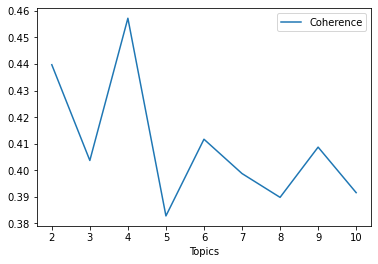

In [5]:
# trial and error    
# memilih nilai alpha dan beta, dalam hal ini 0.01 dan 0.01

# plot untuk memilih topik terbaik
df_plot = df_lda[(df_lda.Alpha == "0.01") & (df_lda.Beta == "0.01") & (df_lda.Validation_Set == "100% Corpus")].copy()
df_plot.plot(x='Topics', y = "Coherence", kind="line")

plt.show()

diperoleh bahwa topik terbaiknya adalah 4, hal ini sejalan dengan nilai coherence yang diperoleh saat melakukannya dengan genshim model, yaitu dengan nilai coherence sebesar 0.4562

In [6]:
# memilih alpha dan beta terbaik
# caranya adalah dengan memilih k = 3 pada tabel, 
# dan cari kombinasi alpha dan beta dengan coherence value terbaik
df_plot_2 = df_lda[(df_lda.Topics == 4) & (df_lda.Validation_Set == "100% Corpus")].copy()

# mengurutkan nilai coherence dari yang terbesar
display(df_plot_2.sort_values(by="Coherence", ascending=False))

,Validation_Set,Topics,Alpha,Beta,Coherence
358,100% Corpus,4,asymmetric,0.9099999999999999,0.507403
349,100% Corpus,4,0.9099999999999999,symmetric,0.498772
346,100% Corpus,4,0.9099999999999999,0.31,0.498772
345,100% Corpus,4,0.9099999999999999,0.01,0.491704
341,100% Corpus,4,0.61,0.31,0.478581
347,100% Corpus,4,0.9099999999999999,0.61,0.472447
344,100% Corpus,4,0.61,symmetric,0.471132
354,100% Corpus,4,symmetric,symmetric,0.467680
340,100% Corpus,4,0.61,0.01,0.465841
351,100% Corpus,4,symmetric,0.31,0.463589


dari tabel di atas, diperoleh nilai alpha terbaik adalah 0.61 dan beta terbaik adalah 0.31 yang menghasilkan nilai coherence sebesar 0.478581

In [17]:
# setelah diperoleh alpha dan beta terbaik, kemudian membuat kembali modelnya
lda_model = gensim.models.LdaMulticore(corpus=doc_term_matrix,
                                           id2word=dictionary,
                                           num_topics=4, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=0.61,
                                           eta=0.31)

# cek hasil
pprint(lda_model.print_topics())

[(0,
  '0.036*"omicron" + 0.013*"varian" + 0.011*"who" + 0.008*"india" + '
  '0.008*"infeksi" + 0.008*"mutasi" + 0.007*"b" + 0.007*"warganegara" + '
  '0.007*"covid" + 0.007*"berusia"'),
 (1,
  '0.088*"omicron" + 0.024*"covid" + 0.021*"malaysia" + 0.011*"who" + '
  '0.010*"omicronvarient" + 0.010*"negara" + 0.008*"varian" + 0.007*"cegah" + '
  '0.007*"kekhawatiran" + 0.006*"kesehatan"'),
 (2,
  '0.043*"omicron" + 0.018*"covid" + 0.014*"malaysia" + 0.013*"negara" + '
  '0.012*"varian" + 0.012*"indonesia" + 0.009*"berita" + 0.007*"karantina" + '
  '0.007*"prokes" + 0.006*"masuk"'),
 (3,
  '0.085*"varian" + 0.084*"omicron" + 0.032*"covid" + 0.015*"virus" + '
  '0.014*"afrika" + 0.014*"corona" + 0.010*"selatan" + 0.009*"vaksin" + '
  '0.009*"singapura" + 0.008*"terdeteksi"')]


dari hasil yang diperoleh, analisis terhadap setiap topiknya adalah sebagai berikut :

1. Infeksi dan mutasi varian covid b omicron di Negara India.

2. WHO khawatir akan kesehatan masyarakat di Negara Malaysia karena covid omicron.

3. Indonesia menerapkan prokes dan karantina untuk mencegah varian covid omicron dari Negara Malaysia.

4. Varian covid omicron terdeteksi di afrika selatan dan singapura.

In [18]:
# memvisualisasikan hasilnya
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, doc_term_matrix, dictionary)

# cek hasil
display(LDAvis_prepared)

# menyimpan hasilnya dalam format html
# dijalankan 1x saja
pyLDAvis.save_html(LDAvis_prepared , 'lda.html')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.148148 -0.018328       1        1  36.568987
1      0.022957 -0.057113       2        1  24.096875
2      0.096094 -0.053725       3        1  22.023722
0      0.029098  0.129167       4        1  17.310416, topic_info=               Term        Freq       Total Category  logprob  loglift
32           varian  135.000000  135.000000  Default  30.0000  30.0000
270        malaysia   35.000000   35.000000  Default  29.0000  29.0000
33           corona   18.000000   18.000000  Default  28.0000  28.0000
228  omicronvarient   10.000000   10.000000  Default  27.0000  27.0000
100          berita    8.000000    8.000000  Default  26.0000  26.0000
..              ...         ...         ...      ...      ...      ...
9             covid    4.254663   80.256438   Topic4  -4.9770  -1.1833
141          afrika    3.114641   25.673550   Topic4  -5.2889  -0.3555
66        indonesia    2.834233   18.572264   Topic4  -5.3833  -0.1260
38        vaksinasi    2.438981   12.629688   Topic4  -5.5335   0.1094
197         selatan    2.394323   16.725500   Topic4  -5.5520  -0.1900

[228 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
141       1  0.740061  afrika
141       2  0.155802  afrika
141       4  0.116852  afrika
64        3  0.962353     air
314       2  0.838023  akibat
...     ...       ...     ...
1120      3  0.909158     wna
469       3  0.531876     wni
469       4  0.398907     wni
1289      2  0.787922     xnk
897       1  0.870439    york

[243 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1])

In [54]:
# menyimpan dataframe df baris kedalam csv
# di run 1x saja
df_baris.to_csv('baris_omicron_rev.csv', index = False, header=True) 

tujuan menyimpan dataframe tersebut adalah agar saat pengerjaan selanjutnya, tidak perlu lagi menjalankan kode program analisis text : topic modelling

### --batas untuk memanggil datanya kembali, batas4

#### 4.3. Text Analysis : Network X. Menentukan jaringan serta hubungannya

In [2]:
# memanggil data yang sudah disimpan sebelumnya
df_rev = pd.read_csv('baris_omicron_rev.csv')

# cek hasil
display(df_rev)

,text,text_clean,skor sentimen,sentimen
0,AS Perketat Pembatasan di Tengah Kekhawatiran ...,as perketat pembatasan kekhawatiran omicron ne...,-2,negatif
1,"Hujan Tak Jadi Penghalang, Polsek Tabanan Laks...",hujan penghalang polsek tabanan laksanakan yus...,-1,negatif
2,Apa gunanya dunia modern yang telah menyediaka...,gunanya dunia modern menyediakan cangkul sekop...,1,positif
3,"Varian Omicron Mungkin Lebih Menular, Tetapi V...",varian omicron menular vaksin harapan omicron,0,netral
4,Penyebaran Virus Omicron di India Meluas secar...,penyebaran virus omicron india meluas lokal in...,-2,negatif
...,...,...,...,...
384,"Terkait hal ini, Menteri Kesehatan Budi Gunadi...",terkait menteri kesehatan budi gunadi sadikin ...,-2,negatif
385,Ia pun memastikan Indonesia dan dunia saat ini...,indonesia dunia cepat mengidentifikasi varian ...,1,positif
386,"“Kita tidak perlu terlalu panik, terburu-buru ...",panik terburuburu mengambil kebijakan berdasar...,-1,negatif
387,"Kendati demikian, pemerintah mulai melakukan a...",kendati pemerintah antisipasi salah satunya me...,-2,negatif


In [3]:
# langkah selanjutnya adalah menyiapkan data 
# data harus berbentuk tuple dengan dua komponen yaitu edge dan weight
# split terlebih dahulu 
word_gram = [word for kata in df_rev['text_clean'] for word in kata.split()]

# cek hasil
print(word_gram)

['as', 'perketat', 'pembatasan', 'kekhawatiran', 'omicron', 'negara', 'masuk', 'kategori', 'level', 'hujan', 'penghalang', 'polsek', 'tabanan', 'laksanakan', 'yustisi', 'ppkm', 'level', 'ii', 'covid', 'omicron', 'polsektabanan', 'ppkm', 'gunanya', 'dunia', 'modern', 'menyediakan', 'cangkul', 'sekop', 'ngurug', 'tanah', 'sekelas', 'menter', 'varian', 'omicron', 'menular', 'vaksin', 'harapan', 'omicron', 'penyebaran', 'virus', 'omicron', 'india', 'meluas', 'lokal', 'india', 'omicron', 'vaksinasi', 'virus', 'corona', 'omicron', 'saudi', 'komisi', 'viii', 'dpr', 'tinjau', 'ulang', 'keberangkatan', 'umrah', 'klik', 'tautan', 'negara', 'mengesahkan', 'ketibaan', 'varian', 'bahaya', 'setakat', 'omicron', 'russia', 'penularan', 'omicron', 'pengerusi', 'msyt', 'menteri', 'kuartet', 'covid', 'kawalan', 'sempadan', 'antarabangsa', 'k', 'satgas', 'penanganan', 'covid', 'menyebut', 'indonesia', 'omicron', 'ditemukan', 'tanah', 'air', 'thailand', 'konfirmasi', 'varian', 'omicron', 'warga', 'as', 'la

In [4]:
# menyiapkan fungsinya yang terdiri atas 2 kata
fdist = nltk.FreqDist(nltk.ngrams(word_gram, 2))

# cek hasil
print(fdist) 

<FreqDist with 2696 samples and 3564 outcomes>


In [5]:
# kemudian disimpan dalam bentuk list dan di customisasi ke dalam dataframe
list_data = [[k,v]for k,v in fdist.items()]
df_bigram = pd.DataFrame(list_data, columns=['bigram', 'count'])

# cek hasil
display(df_bigram)

,bigram,count
0,"(as, perketat)",1
1,"(perketat, pembatasan)",1
2,"(pembatasan, kekhawatiran)",1
3,"(kekhawatiran, omicron)",3
4,"(omicron, negara)",4
...,...,...
2691,"(kemenkumham, nomor)",1
2692,"(nomor, berlaku)",1
2693,"(berlaku, efektif)",1
2694,"(efektif, tanggal)",1


In [6]:
# kemudian melakukan sort
# trial and error : sort 400 saja
df_bigram_sort = df_bigram.sort_values(by=["count"], ascending=False).copy().reset_index(drop=True)[:400]

# cek hasil
display(df_bigram_sort)

,bigram,count
0,"(varian, omicron)",98
1,"(covid, omicron)",49
2,"(omicron, covid)",21
3,"(omicron, malaysia)",21
4,"(varian, covid)",19
...,...,...
395,"(vaksin, omicron)",2
396,"(omicron, bandara)",2
397,"(penyakit, covid)",2
398,"(pencegahan, kawalan)",2


In [7]:
# kemudian melakukan transformasi bentuk dataset ke dalam dictionary
trans = df_bigram_sort.set_index("bigram").T.to_dict("records")

# cek hasil
display(trans)

[{('varian', 'omicron'): 98,
  ('covid', 'omicron'): 49,
  ('omicron', 'covid'): 21,
  ('omicron', 'malaysia'): 21,
  ('varian', 'covid'): 19,
  ('afrika', 'selatan'): 18,
  ('covid', 'varian'): 16,
  ('omicron', 'omicron'): 16,
  ('virus', 'corona'): 13,
  ('omicron', 'who'): 11,
  ('omicron', 'omicronvariant'): 10,
  ('protokol', 'kesehatan'): 8,
  ('omicron', 'ditemukan'): 6,
  ('omicron', 'masuk'): 6,
  ('omicron', 'varian'): 6,
  ('virus', 'omicron'): 6,
  ('pintu', 'masuk'): 6,
  ('varian', 'virus'): 6,
  ('vaksin', 'covid'): 6,
  ('varian', 'delta'): 6,
  ('omicron', 'omicronvarient'): 6,
  ('top', 'news'): 5,
  ('omicron', 'menyebar'): 5,
  ('negara', 'asia'): 5,
  ('omicron', 'singapura'): 5,
  ('news', 'koran'): 5,
  ('corona', 'omicron'): 5,
  ('koran', 'rakyat'): 5,
  ('viral', 'viraltiktok'): 5,
  ('varian', 'baharu'): 5,
  ('corona', 'varian'): 5,
  ('rakyat', 'merdeka'): 5,
  ('newsupdate', 'viral'): 5,
  ('covid', 'covid'): 5,
  ('klik', 'tautan'): 5,
  ('kematian', 'ak

In [8]:
# kemudian menginisiasi objek networkx dan memasukkan relasi antar node beserta weight nya
# di run 1x saja
G = nx.Graph()

nodes_size = []
for k,v in trans[0].items():
    G.add_edge(k[0], k[1], weight=(v*10))

In [9]:
# mencari nilai degree dari setiap nodenya
deg = dict(G.degree)

# cek hasil
display(deg)

{'varian': 40,
 'omicron': 69,
 'covid': 33,
 'malaysia': 13,
 'afrika': 11,
 'selatan': 2,
 'virus': 7,
 'corona': 6,
 'who': 6,
 'omicronvariant': 2,
 'protokol': 3,
 'kesehatan': 7,
 'ditemukan': 1,
 'masuk': 8,
 'pintu': 3,
 'vaksin': 3,
 'delta': 3,
 'omicronvarient': 1,
 'top': 1,
 'news': 4,
 'menyebar': 2,
 'negara': 9,
 'asia': 5,
 'singapura': 6,
 'koran': 2,
 'rakyat': 4,
 'viral': 2,
 'viraltiktok': 2,
 'baharu': 3,
 'merdeka': 1,
 'newsupdate': 2,
 'klik': 3,
 'tautan': 2,
 'kematian': 1,
 'akibat': 3,
 'waspada': 3,
 'cegah': 1,
 'b': 5,
 'berita': 6,
 'beritaviral': 2,
 'beritaterkini': 2,
 'pasifik': 1,
 'dilaporkan': 2,
 'januari': 1,
 'menteri': 2,
 'kesihatan': 5,
 'terdeteksi': 3,
 'penanganan': 3,
 'mengintai': 1,
 'kitajagakita': 3,
 'menular': 1,
 'risiko': 2,
 'masuknya': 1,
 'novavax': 2,
 'produksi': 2,
 'taatprokesselamapandemi': 1,
 'positif': 1,
 'munculnya': 1,
 'sepertiga': 2,
 'as': 4,
 'coronavirus': 2,
 'pulang': 2,
 'indonesia': 6,
 'mencegah': 5,
 'm

In [11]:
# menentukan koordinat
pos = nx.spring_layout(G, k=2.5)

# cek output variabel pos
display(pos)

{'varian': array([ 0.0873598 , -0.01563606]),
 'omicron': array([0.04588781, 0.08873341]),
 'covid': array([ 0.03306308, -0.0144501 ]),
 'malaysia': array([-0.06734894,  0.27387161]),
 'afrika': array([-0.12834859, -0.20917094]),
 'selatan': array([ 0.09474727, -0.44949031]),
 'virus': array([ 0.22671565, -0.16653939]),
 'corona': array([ 0.31159968, -0.01540469]),
 'who': array([ 0.72892808, -0.71715052]),
 'omicronvariant': array([-0.00465839, -0.96860521]),
 'protokol': array([-0.72469752, -0.62531128]),
 'kesehatan': array([-0.18799665,  0.06845975]),
 'ditemukan': array([-0.94562368,  0.11440865]),
 'masuk': array([0.39921106, 0.56561705]),
 'pintu': array([0.43581237, 0.89909927]),
 'vaksin': array([0.62692587, 0.3644848 ]),
 'delta': array([-0.02254616,  0.97973381]),
 'omicronvarient': array([-0.88597178, -0.36038229]),
 'top': array([0.95640281, 0.10781069]),
 'news': array([ 0.83112537, -0.36648219]),
 'menyebar': array([0.63522029, 0.74768963]),
 'negara': array([ 0.18912484

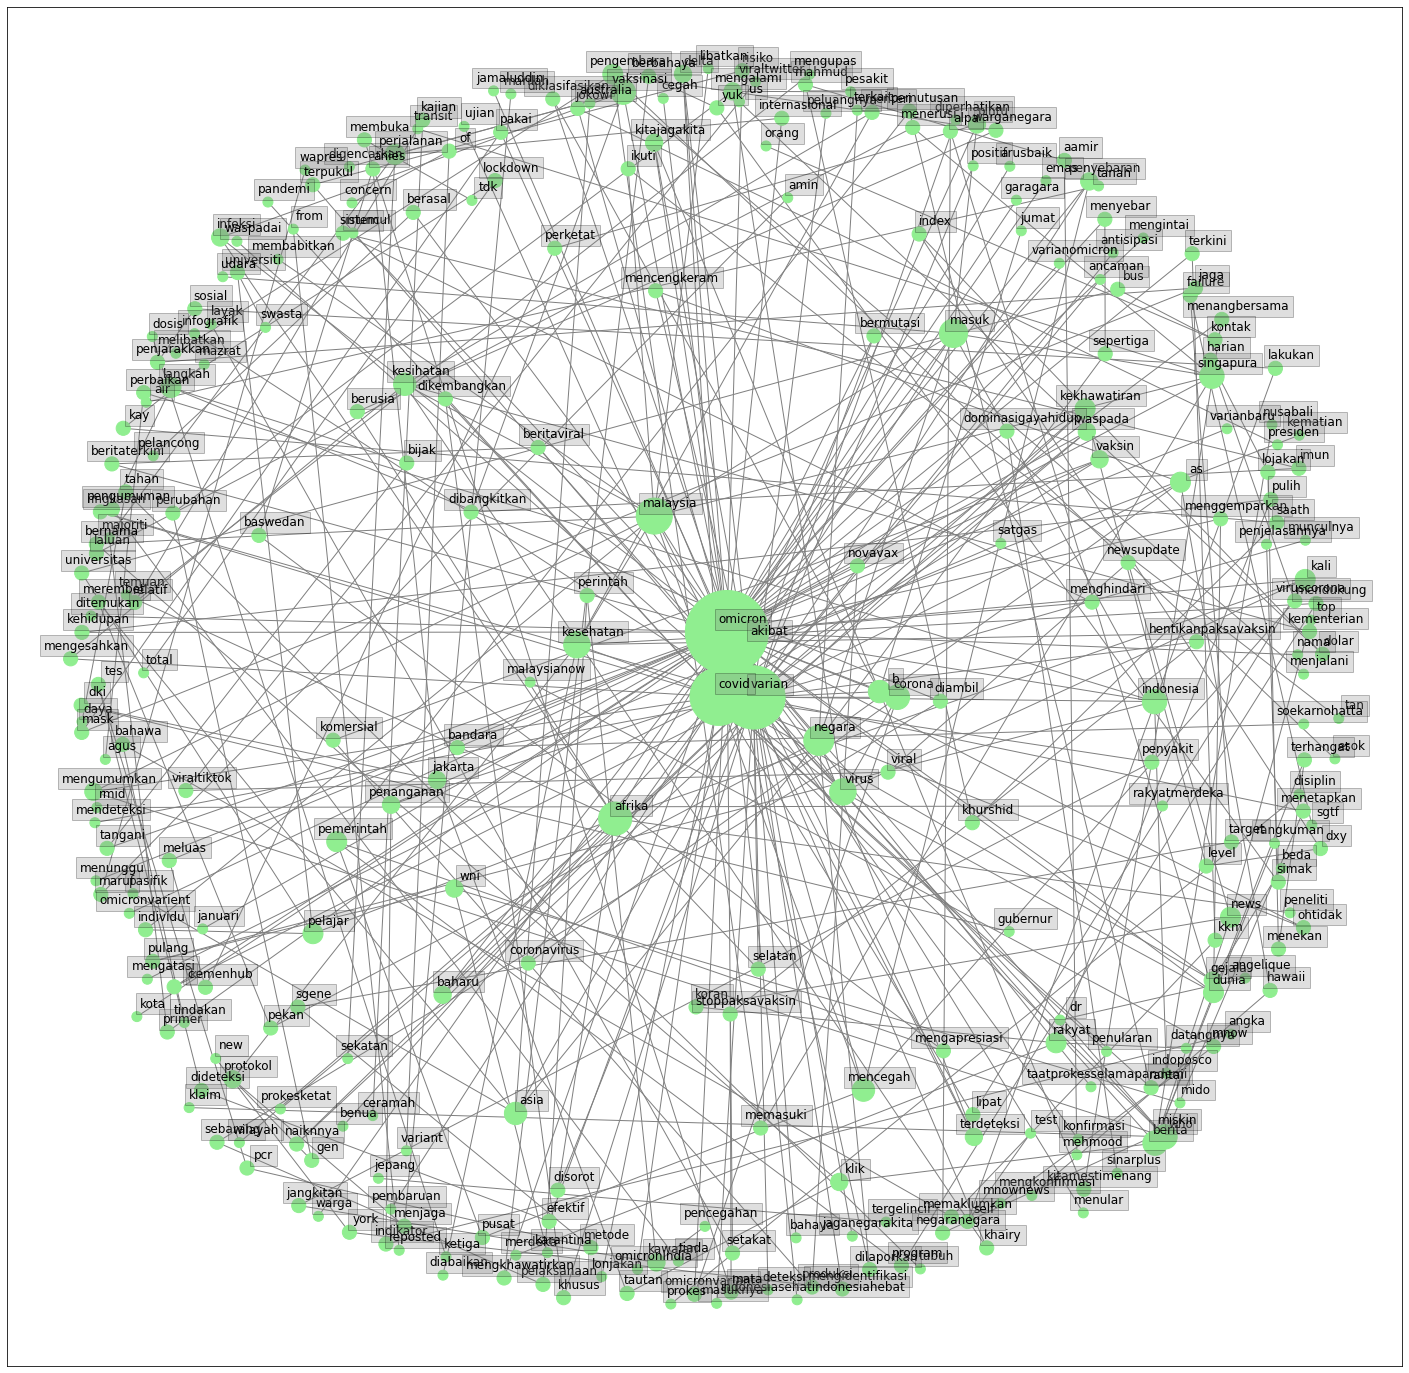

In [12]:
# plotting the data
# Plot networks
# melakukan plotting untuk pemetaan koordinat
# membuat ukuran figurenya
fig, ax = plt.subplots(figsize=(25, 25))

nx.draw_networkx(G,pos,
                 font_size=12,
                 width=1,
                 edge_color='grey',
                 node_color='lightgreen',
                 with_labels = False,
                 node_size = [v * 100 for v in deg.values()],
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.025, value[1]+.015
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='grey', alpha=0.25),
            horizontalalignment='center', fontsize=12)
    
plt.show()

dari hasil grafik network x di atas, dapat dilihat bahwa networknya masih terlalu ramai. Oleh sebab itu, akan dilakukan reduce dengan filter degree > 2

In [13]:
# filter degree
deg_filter= G.degree()
items_filter = [n for n in deg_filter if n[1] > 2]
node = [node[0] for node in items_filter]
degree = [node[1]*200 for node in items_filter]

In [14]:
# cek hasil
print(items_filter)
print('-------------------------------------------------------------------------------------------------------')
print(node)
print('-------------------------------------------------------------------------------------------------------')
print(degree)

[('varian', 40), ('omicron', 69), ('covid', 33), ('malaysia', 13), ('afrika', 11), ('virus', 7), ('corona', 6), ('who', 6), ('protokol', 3), ('kesehatan', 7), ('masuk', 8), ('pintu', 3), ('vaksin', 3), ('delta', 3), ('news', 4), ('negara', 9), ('asia', 5), ('singapura', 6), ('rakyat', 4), ('baharu', 3), ('klik', 3), ('akibat', 3), ('waspada', 3), ('b', 5), ('berita', 6), ('kesihatan', 5), ('terdeteksi', 3), ('penanganan', 3), ('kitajagakita', 3), ('as', 4), ('indonesia', 6), ('mencegah', 5), ('penyebaran', 3), ('dunia', 4), ('kekhawatiran', 4), ('wni', 3), ('kali', 4), ('mengalami', 3), ('vaksinasi', 6), ('jakarta', 3), ('langkah', 4), ('perjalanan', 4), ('gejala', 3), ('infeksi', 3), ('pelajar', 4), ('pengembara', 4), ('kawalan', 3), ('pemerintah', 4), ('mengumumkan', 3)]
-------------------------------------------------------------------------------------------------------
['varian', 'omicron', 'covid', 'malaysia', 'afrika', 'virus', 'corona', 'who', 'protokol', 'kesehatan', 'masuk',

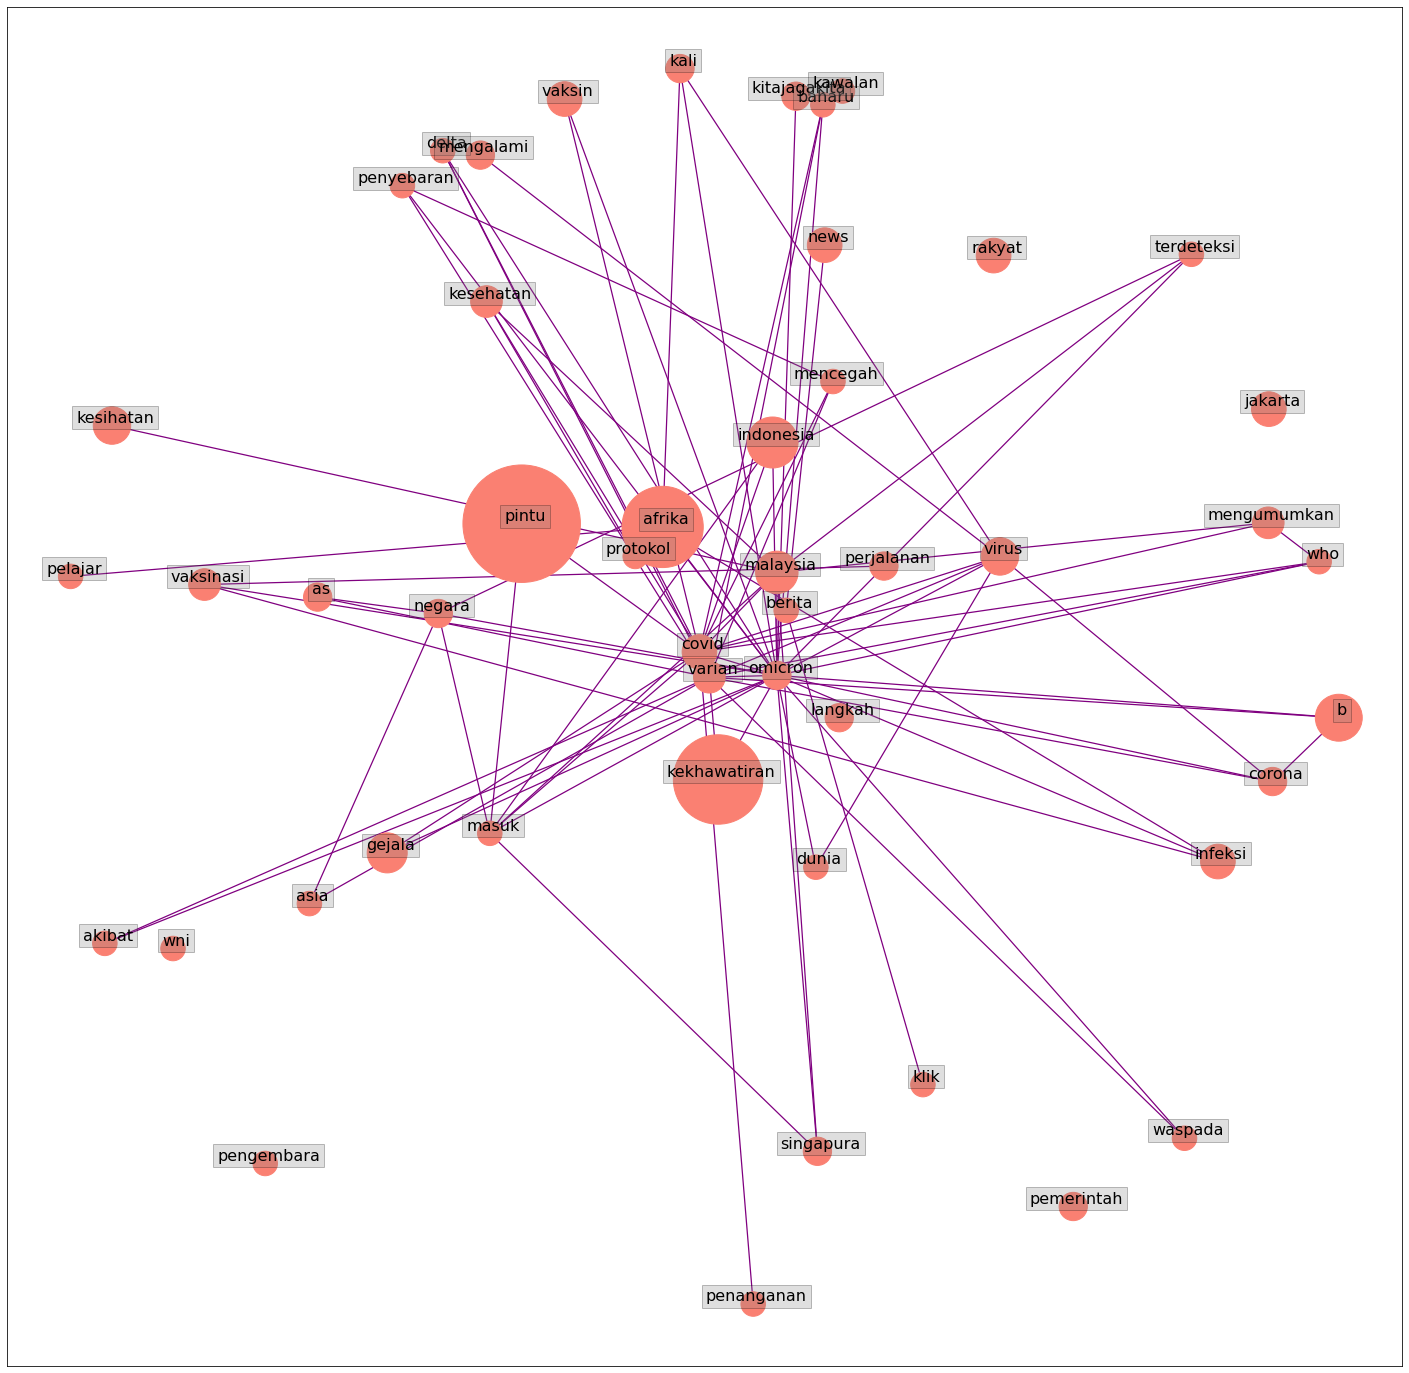

In [25]:
# plotting the data
# mengatur ukuran figure
fig, ax = plt.subplots(figsize=(25, 25))

pos = nx.spring_layout(G, k=2.5)
k = G.subgraph(node)
print(k)

nx.draw_networkx(k,pos,
                 font_size=14,
                 font_color='black',
                 width=1.25,
                 edge_color='purple',
                 node_color='salmon',
                 node_size = degree,
                 with_labels= False,
                 ax=ax)
                    
# # Create offset labels
for key, value in pos.items():
    if key in node:
        x, y = value[0]+.005, value[1]+.005
        ax.text(x, y,
                s=key,
                bbox=dict(facecolor='grey', alpha=0.25),
                horizontalalignment='center', fontsize=16)       

plt.show()

dari graph di atas, dapat dilihat bahwa terdapat beberapa kata yang tidak memiliki hubungan dengan kata yang lain, seperti kata pengembara, pemerintah, wni, jakarta, rakyat, dan kawalan.

### 5. *Data Interpretation*
#### Membuat interpretasi berdasarkan hasil analisis teks yang sudah dilakukan ~~

Berdasarkan analisis teks yang sudah dilakukan, dapat diperoleh informasi sebagai berikut :

**1. Analisis teks berdasarkan frekuensi kata**
- Untuk grafik Jumlah Karakter per baris teks, distribusi terbanyak berada pada rentang 60 - 90 karakter per baris teks.

- Untuk grafik Distribusi Panjang Kata per baris teks, distribusi terbanyak berada pada rentang 8 - 11 kata per baris teks.

- Untuk grafik Distribusi Panjang Rata-rata Kata per baris teks, distribusi terbanyak berada pada rentang 6 - 8 karakter per kata per baris teks.

- Artinya, mayoritas kata pada tweet tersebut berada pada 6 sampai 8 kata dengan setiap kata berada pada rentang 8 sampai 11 karakter dan totalnya berada pada 60 sampai dengan 90 karakter.

- Dari grafik distribusi kata, terdapat 3 kata yang memiliki frekuensi terbanyak, yaitu omicron, varian, dan covid secara berturut-turut.

- Kemudian output dengan menggunakan bi-grams, dapat dilihat bahwa hal yang sering dibicarakan yaitu mengenai varian omicron di Negara Malaysia dan Afrika Selatan.

- Dengan menggunakan wordcloud, dapat dilihat bahwa kata 'omicron' merupakan tema dari kumpulan teks tersebut dan beberapa kata yang lain seperti malaysia, singapura, afrika selatan, indonesia, adalah sebagai penjelas. Sehingga dapat disimpulkan bahwa dalam wordcloud tersebut sedang membahas mengenai varian omicron di negara malaysia, indonesia, singapura, dan afrika selatan.

**2. Analisis teks : Analisis Sentimen**
- Sentimen yang diperoleh berdasarkan analisis tersebut adalah negatif. 

- Apabila dilihat pada grafik skor sentimen, hasilnya menunjukkan sentimen yang netral. Terdapat banyak sekali baris yang mengandung sentimen netral. Hal ini disebabkan oleh bahasa yang terdapat dalam baris teks tersebut adalah bahasa luar negeri dan beberapa kata yang tidak bermakna.

- Analisis tersebut dilakukan secara manual, melalui perbandingan kata yang diperoleh dari kamus kata positif dan kata negatif. Karena dilakukan secara manual, maka terdapat beberapa kata dalam baris teks yang tidak ada di dalam kamus. Sarannya adalah untuk mencoba analisis sentimen menggunakan metode naive bayes. 

**3. Analisis teks : Topic Modelling**
- Berdasarkan topic modelling yang menggunakan metode Latent Dirichlet Allocation (LDA), terdapat analisis terhadap setiap topiknya dengan jumlah topik adalah 4, yaitu infeksi dan mutasi varian covid b omicron di Negara India, WHO khawatir akan kesehatan masyarakat di Negara Malaysia karena covid omicron, indonesia menerapkan prokes dan karantina untuk mencegah varian covid omicron dari Negara Malaysia, dan Varian covid omicron terdeteksi di afrika selatan dan singapura.

- Nilai Coherence Score yang diperoleh adalah 0.4562. Nilai tersebut menunjukkan nilai jarak dari setiap kata pada suatu topik. Sehingga, dapat disimpulkan bahwa jarak setiap kata terhadap topik tersebut adalah cukup dekat.

- Apabila dilihat dari visualisasi LDAvis, dapat dilihat bahwa topik 2 dan 3, yaitu topik WHO khawatir akan kesehatan masyarakat di Negara Malaysia karena covid omicron dan indonesia menerapkan prokes dan karantina untuk mencegah varian covid omicron dari Negara Malaysia, memiliki hubungan antartopik yang sangat dekat, tetapi keduanya memiliki hubungan antartopik yang cukup jauh dengan topik 1, yaitu infeksi dan mutasi varian covid b omicron di Negara India, dan topik 4, yaitu Varian covid omicron terdeteksi di afrika selatan dan singapura.

#### 4. Analisis teks : Network X
- Berdasarkan grafik network x yang sudah terbentuk, dapat dilihat bahwa terdapat beberapa kata yang tidak memiliki hubungan dengan kata yang lain, seperti kata pengembara, pemerintah, wni, jakarta, rakyat, dan kawalan.
- Terdapat tiga kata yang memiliki hubungan yang sangat banyak dengan kata yang lain, yaitu omicron, varian, dan covid. Ketiga kata tersebut memiliki degree yang tinggi di antara degree kata yang lain. Artinya, semakin tinggi nilai degreenya, maka kata tersebut akan semakin banyak hubungannya. Sebaliknya, semakin kecil nilai degreenya, maka kata tersebut cenderung semakin sedikit memiliki hubungan dengan kata yang lain.
- Dalam Network x, *centrality* merupakan indikator yang penting dalam interpretasi grafik. Apabila suatu kata semakin terletak di tengah, maka kata tersebut cenderung memiliki hubungan yang sangat banyak dengan kata yang lain. Sebaliknya, apabila suatu kata terletak semakin pinggir, maka kata tersebut cenderung untuk memiliki hubungan yang sedikit dengan kata yang lain.
- Pada gambar network x yang pertama, dapat dilihat bahwa suatu kata yang semakin besar ukuran ukuran nodenya, maka kata tersebut relatif memiliki hubungan yang sangat banyak dengan kata yang lain. Sebaliknya, semakin semakin kecil ukuran node dari suatu kata, maka kata tersebut cenderung memiliki hubungan yang sedikit dengan kata yang lain.
- *Centrality* memiliki hubungan yang searah dengan jumlah degree. Semakin tinggi nilai degreenya, maka kata tersebut akan semakin terletak di center. Sebaliknya semakin rendah nilai degreenya, maka kata tersebut akan semakin terletak di pinggir.